In [1]:
# Data manipulation
import datetime
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
from skimpy import skim, clean_columns
import missingno as msno
import empiricaldist as ed

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas settings
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 60
pd.options.display.float_format = '{:,.3f}'.format

# Visualization settings
from matplotlib import rcParams
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
# rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
custom_palette = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']
custom_hue = ['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0', '#c1e7ff']
custom_divergent = ['#00876c', '#6aaa96', '#aecdc2', '#f1f1f1', '#f0b8b8', '#e67f83', '#d43d51']
sns.set_palette(custom_palette)
%config InlineBackend.figure_format = 'retina'

## Acquiring and Loading Data
### Loading Data

In [83]:
# Load DataFrame
file = 'UM_datathon_2024.csv'
df = pd.read_csv(file)

### Basic Data Exploration

In [84]:
# Show rows and columns count
print(f"Rows count: {df.shape[0]} ; Columns count: {df.shape[1]}")

Rows count: 41498 ; Columns count: 43


In [85]:
df.head()

time             difficulty  estimated_leverage_ratio  \
0  2020-03-25 10:00:00 16,552,923,967,337.230                     0.071   
1  2020-03-25 11:00:00 16,552,923,967,337.230                     0.072   
2  2020-03-25 12:00:00 16,552,923,967,337.230                     0.073   
3  2020-03-25 13:00:00                    NaN                     0.071   
4  2020-03-25 14:00:00 16,552,923,967,337.230                     0.072   

   addresses_count_active  addresses_count_sender  addresses_count_receiver  \
0                   30656                   12888                     21617   
1                   21379                    8467                     14875   
2                   29164                   13292                     19201   
3                       0                       0                         0   
4                   25234                   10221                     18363   

   exchange_whale_ratio  coinbase_premium_gap  coinbase_premium_index  \
0                 0.941                12.500                   0.189   
1                 0.886                18.640                   0.286   
2                 0.885                17.170                   0.261   
3                 0.000                16.120                   0.245   
4                 0.867                14.460                   0.218   

   coinbase_premium_gap_usdt_adjusted  coinbase_premium_index_usdt_adjusted  \
0                               1.126                                 0.017   
1                               2.369                                 0.036   
2                               7.388                                 0.112   
3                               4.340                                 0.066   
4                              -2.762                                -0.042   

   taker_buy_volume  taker_sell_volume  taker_buy_ratio  taker_sell_ratio  \
0   122,718,808.155    157,205,129.764            0.438             0.562   
1    90,198,446.442     91,569,595.501            0.496             0.504   
2    57,963,331.726     39,976,612.040            0.592             0.408   
3   127,248,570.502    111,609,564.979            0.533             0.467   
4    84,545,864.333     79,004,855.006            0.517             0.483   

   taker_buy_sell_ratio  blockreward  blockreward_usd  fees_transaction_mean  \
0                 0.781       39.431      268,448.334                  0.000   
1                 0.985       26.232      171,000.022                  0.000   
2                 1.450       39.346      258,274.574                  0.000   
3                 1.140        0.000            0.000                    NaN   
4                 1.070       39.947      264,083.365                  0.000   

   fees_transaction_mean_usd  fees_transaction_median  \
0                      1.490                    0.000   
1                      1.403                    0.000   
2                      1.522                    0.000   
3                        NaN                    0.000   
4                      2.156                    0.000   

   fees_transaction_median_usd  miner_supply_ratio  addresses_count_inflow  \
0                        0.856               0.102                     160   
1                        0.784               0.102                     131   
2                        0.790               0.102                     137   
3                        0.000               0.102                       0   
4                        1.118               0.102                      96   

   addresses_count_outflow  exchange_supply_ratio  transactions_count_inflow  \
0                       96                  0.085                        118   
1                       71                  0.085                         87   
2                       81                  0.085                         97   
3                        0                  0.085                          0   
4                     

### Check Data Types

In [86]:
# Show df types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41498 entries, 0 to 41497
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   time                                  41498 non-null  object 
 1   difficulty                            41363 non-null  float64
 2   estimated_leverage_ratio              41498 non-null  float64
 3   addresses_count_active                41498 non-null  int64  
 4   addresses_count_sender                41498 non-null  int64  
 5   addresses_count_receiver              41498 non-null  int64  
 6   exchange_whale_ratio                  41498 non-null  float64
 7   coinbase_premium_gap                  41466 non-null  float64
 8   coinbase_premium_index                41466 non-null  float64
 9   coinbase_premium_gap_usdt_adjusted    41466 non-null  float64
 10  coinbase_premium_index_usdt_adjusted  41466 non-null  float64
 11  taker_buy_volum

- `all columns` are **floats** or **integers**.
- `all columns` are **non-null**.

`column0` should be a **datetime** type instead.

### Check Missing Data

In [87]:
# Print percentage of missing values
missing_percent = df.isna().mean().sort_values(ascending=False)
missing_count = df.isna().sum().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    # Print only columns with missing values in table format
    print(pd.DataFrame({'Missing Count': missing_count[missing_count > 0], 'Missing Percentage (%)': missing_percent[missing_percent > 0] * 100}))
else:
    print('None')

---- Percentage of Missing Values (%) -----
                                      Missing Count  Missing Percentage (%)
difficulty                                      135                   0.325
fees_transaction_mean_usd                       135                   0.325
fees_transaction_mean                           135                   0.325
tokens_transferred_mean                         135                   0.325
coinbase_premium_index                           32                   0.077
coinbase_premium_gap_usdt_adjusted               32                   0.077
coinbase_premium_index_usdt_adjusted             32                   0.077
coinbase_premium_gap                             32                   0.077
taker_buy_ratio                                   7                   0.017
taker_buy_sell_ratio                              7                   0.017
taker_sell_ratio                                  7                   0.017
taker_sell_volume                           

#### Check Data Range

In [88]:
# Print summary statistics
df.describe(include='all')
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 41498  │ │ float64     │ 33    │                                                          │
│ │ Number of columns │ 43     │ │ int64       │ 9     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA  ┃ NA %     ┃ mean    ┃ sd       ┃ p0      ┃ p25      ┃ p50     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ difficu │ 135 │ 0.325316 │ 4206000 │ 26290000 │ 1367000 │ 20610000 │ 3028000 │ 57320000 │ 1085000 │ ▇▃▂▁▂▁ │  │
│ │ lty     │     │ 88274133 │ 0000000 │   000000 │ 0000000 │   000000 │ 0000000 │   000000 │ 0000000 │        │  │
│ │         │     │       69 │         │          │         │          │         │          │       0 │        │  │
│ │ estimat │   0 │        0 │  0.1829 │  0.04818 │ 0.06979 │   0.1476 │  0.1761 │   0.2119 │  0.3595 │ ▁▇▇▃▁  │  │
│ │ ed_leve │     │          │         │          │         │          │         │          │         │        │  │
│ │ rage_ra │     │          │         │          │         │          │         │          │         │        │  │
│ │ tio     │     │          │         │          │         │          │         │          │         │        │  │
│ │ address │   0 │        0 │   52900 │    19290 │       0 │    39620 │   51100 │    64620 │  162500 │  ▁▇▆▁  │  │
│ │ es_coun │     │          │         │          │         │          │         │          │         │        │  │
│ │ t_activ │     │          │         │          │         │          │         │          │         │        │  │
│ │ e       │     │          │         │          │         │          │         │          │         │        │  │
│ │ address │   0 │        0 │   29240 │    13080 │       0 │    20010 │   27590 │    36780 │  123000 │  ▃▇▂   │  │
│ │ es_coun │     │          │         │          │         │          │         │          │         │        │  │
│ │ t_sende │     │          │         │          │         │          │         │          │         │        │  │
│ │ r       │     │          │         │          │         │          │         │          │         │        │  │
│ │ address │   0 │        0 │   28750 │    11070 │       0 │    21000 │   27420 │    35260 │  100400 │  ▂▇▃▁  │  │
│ │ es_coun │     │          │         │          │         │          │         │          │         │        │  │
│ │ t_recei │     │          │         │          │         │          │         │          │         │        │  │
│ │ ver     │     │          │         │          │         │          │         │          │         │        │  │
│ │ exchang │   0 │        0 │  0.8719 │  0.09756 │       0 │   0.8305 │  0.8892 │   0.9359 │  0.9996 │     ▃▇ │  │
│ │ e_whale │     │          │         │          │         │          │         │          │         │        │  │
│ │ _ratio  │     │          │         │          │     

## Data Preprocessing

### Changing Data Types

In [89]:
# Convert columns to the right data types
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)

C:\Users\MCYK\AppData\Local\Temp\ipykernel_16540\3314229265.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)


In [90]:
# Verify conversion
assert ptypes.is_datetime64_any_dtype(df['time'])

### Handling Missing Values

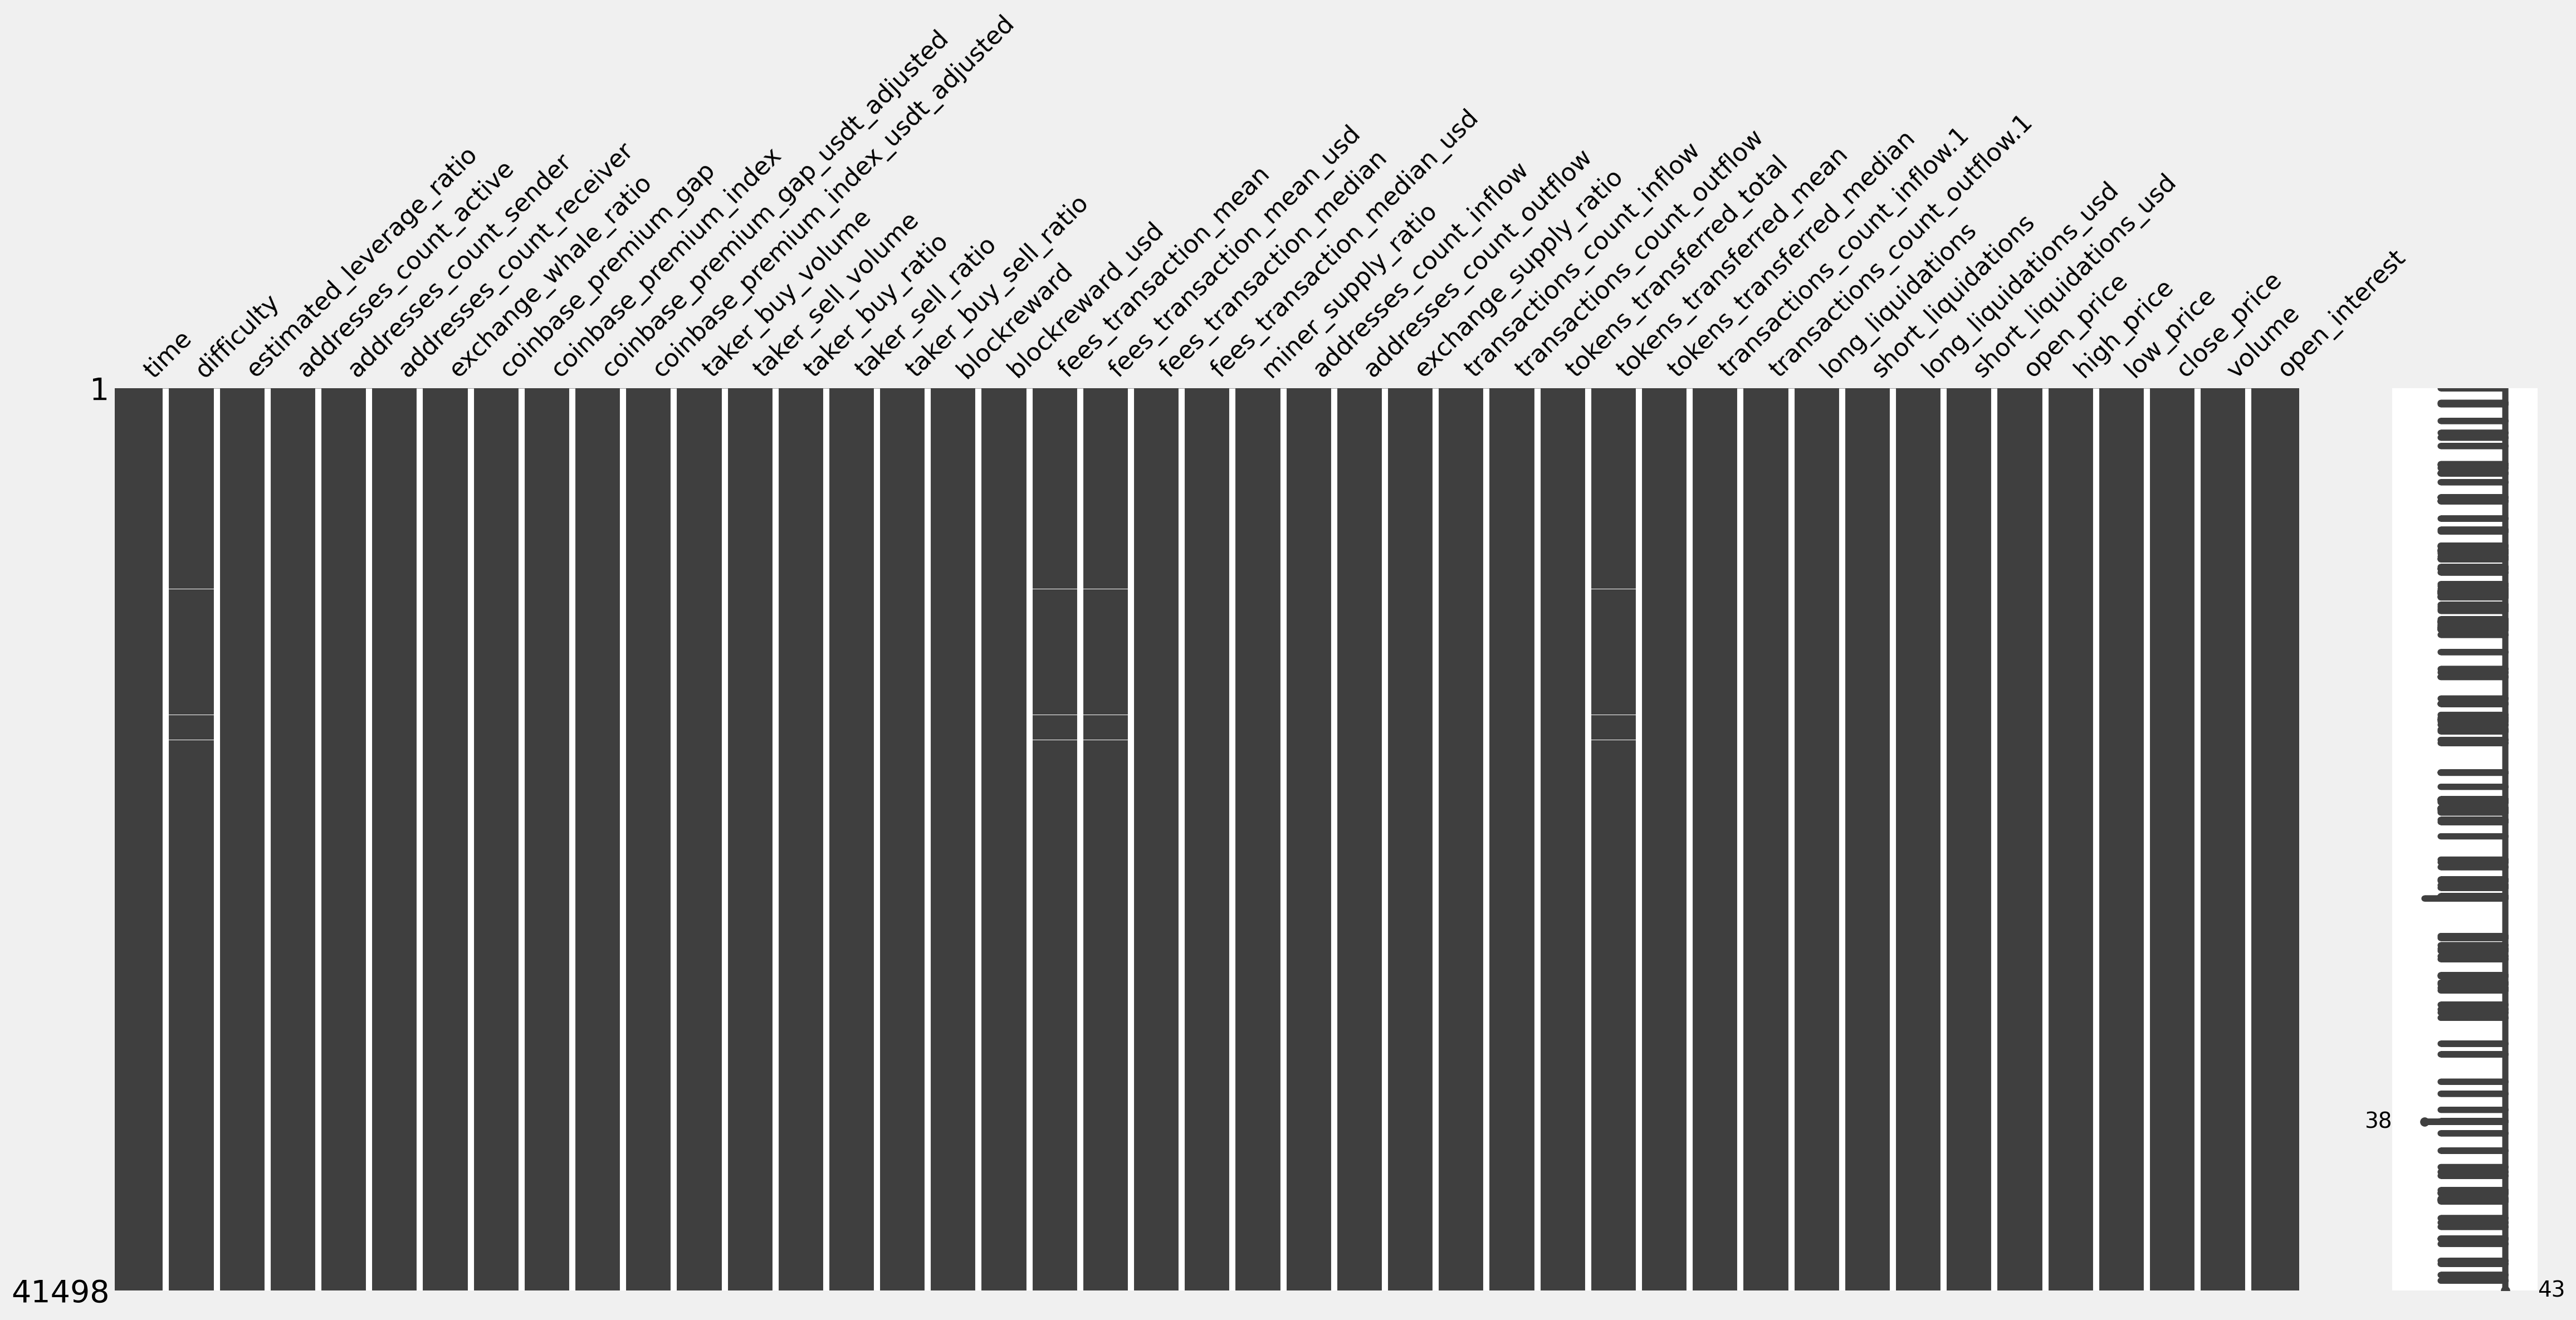

In [91]:
msno.matrix(df.sort_values(by='time', ascending=True));

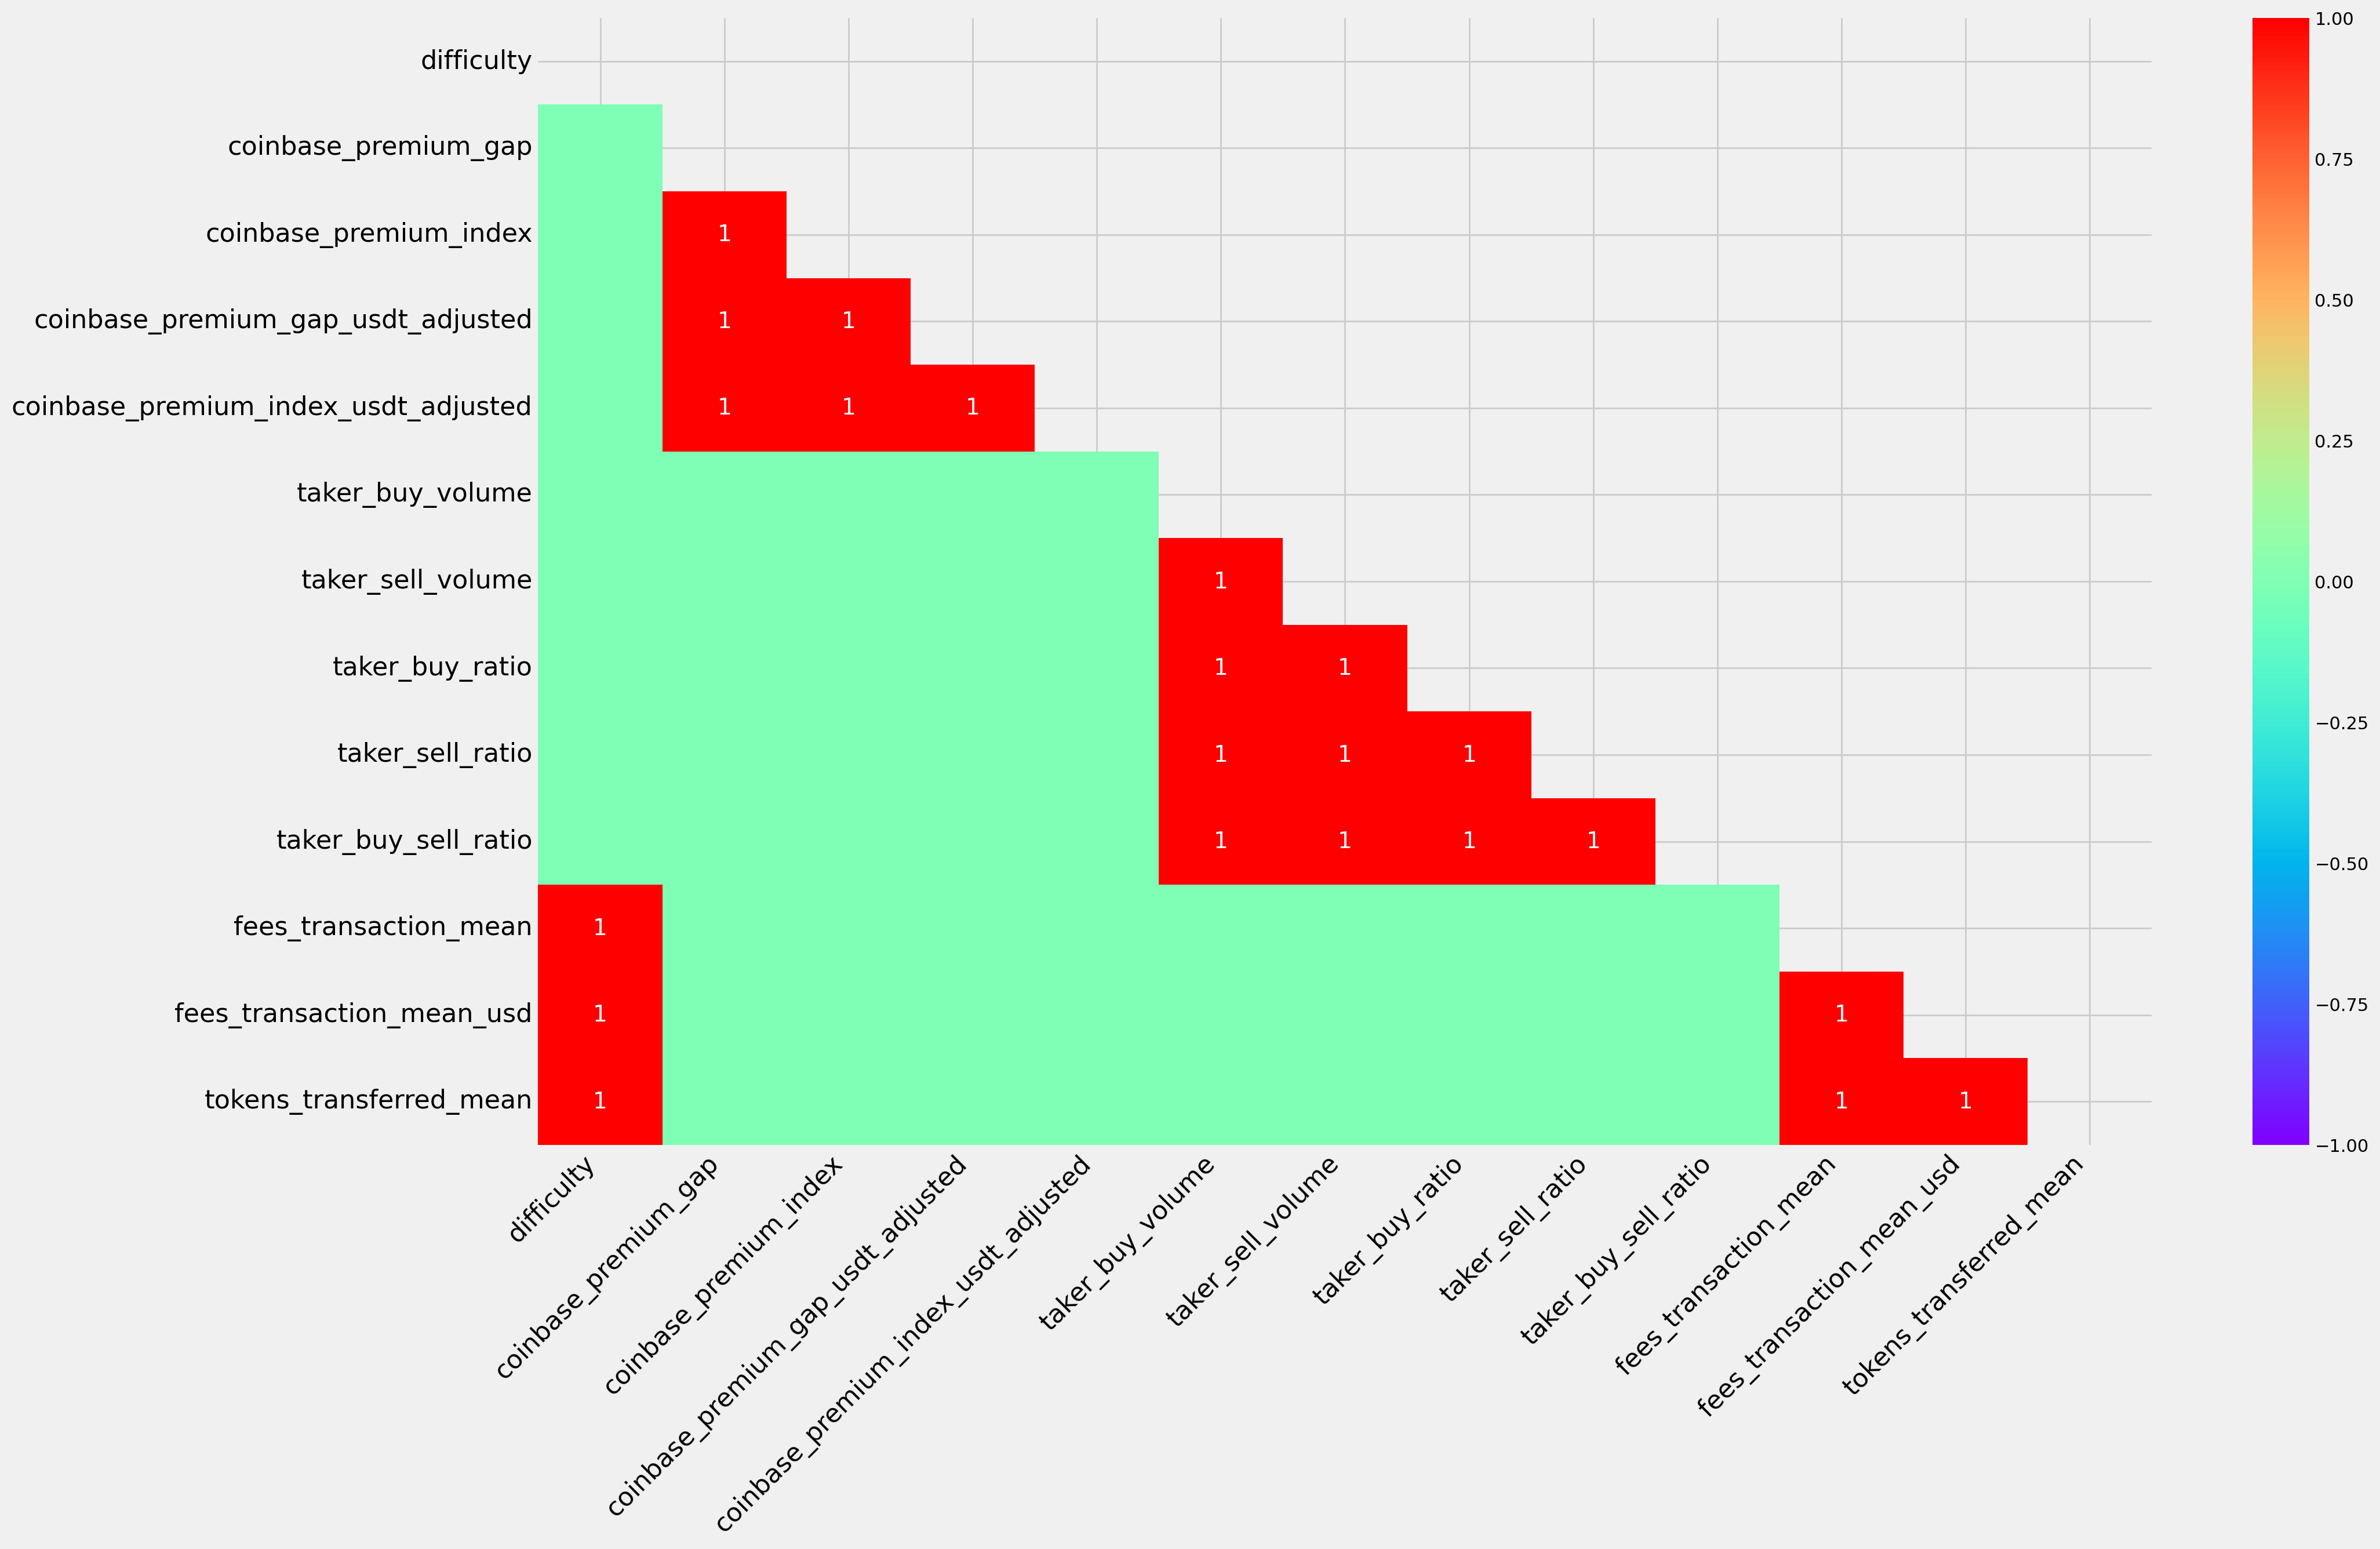

In [92]:
msno.heatmap(df, cmap='rainbow');

In [93]:
# Drop rows with missing values
df.dropna(inplace=True)

### Data Analysis

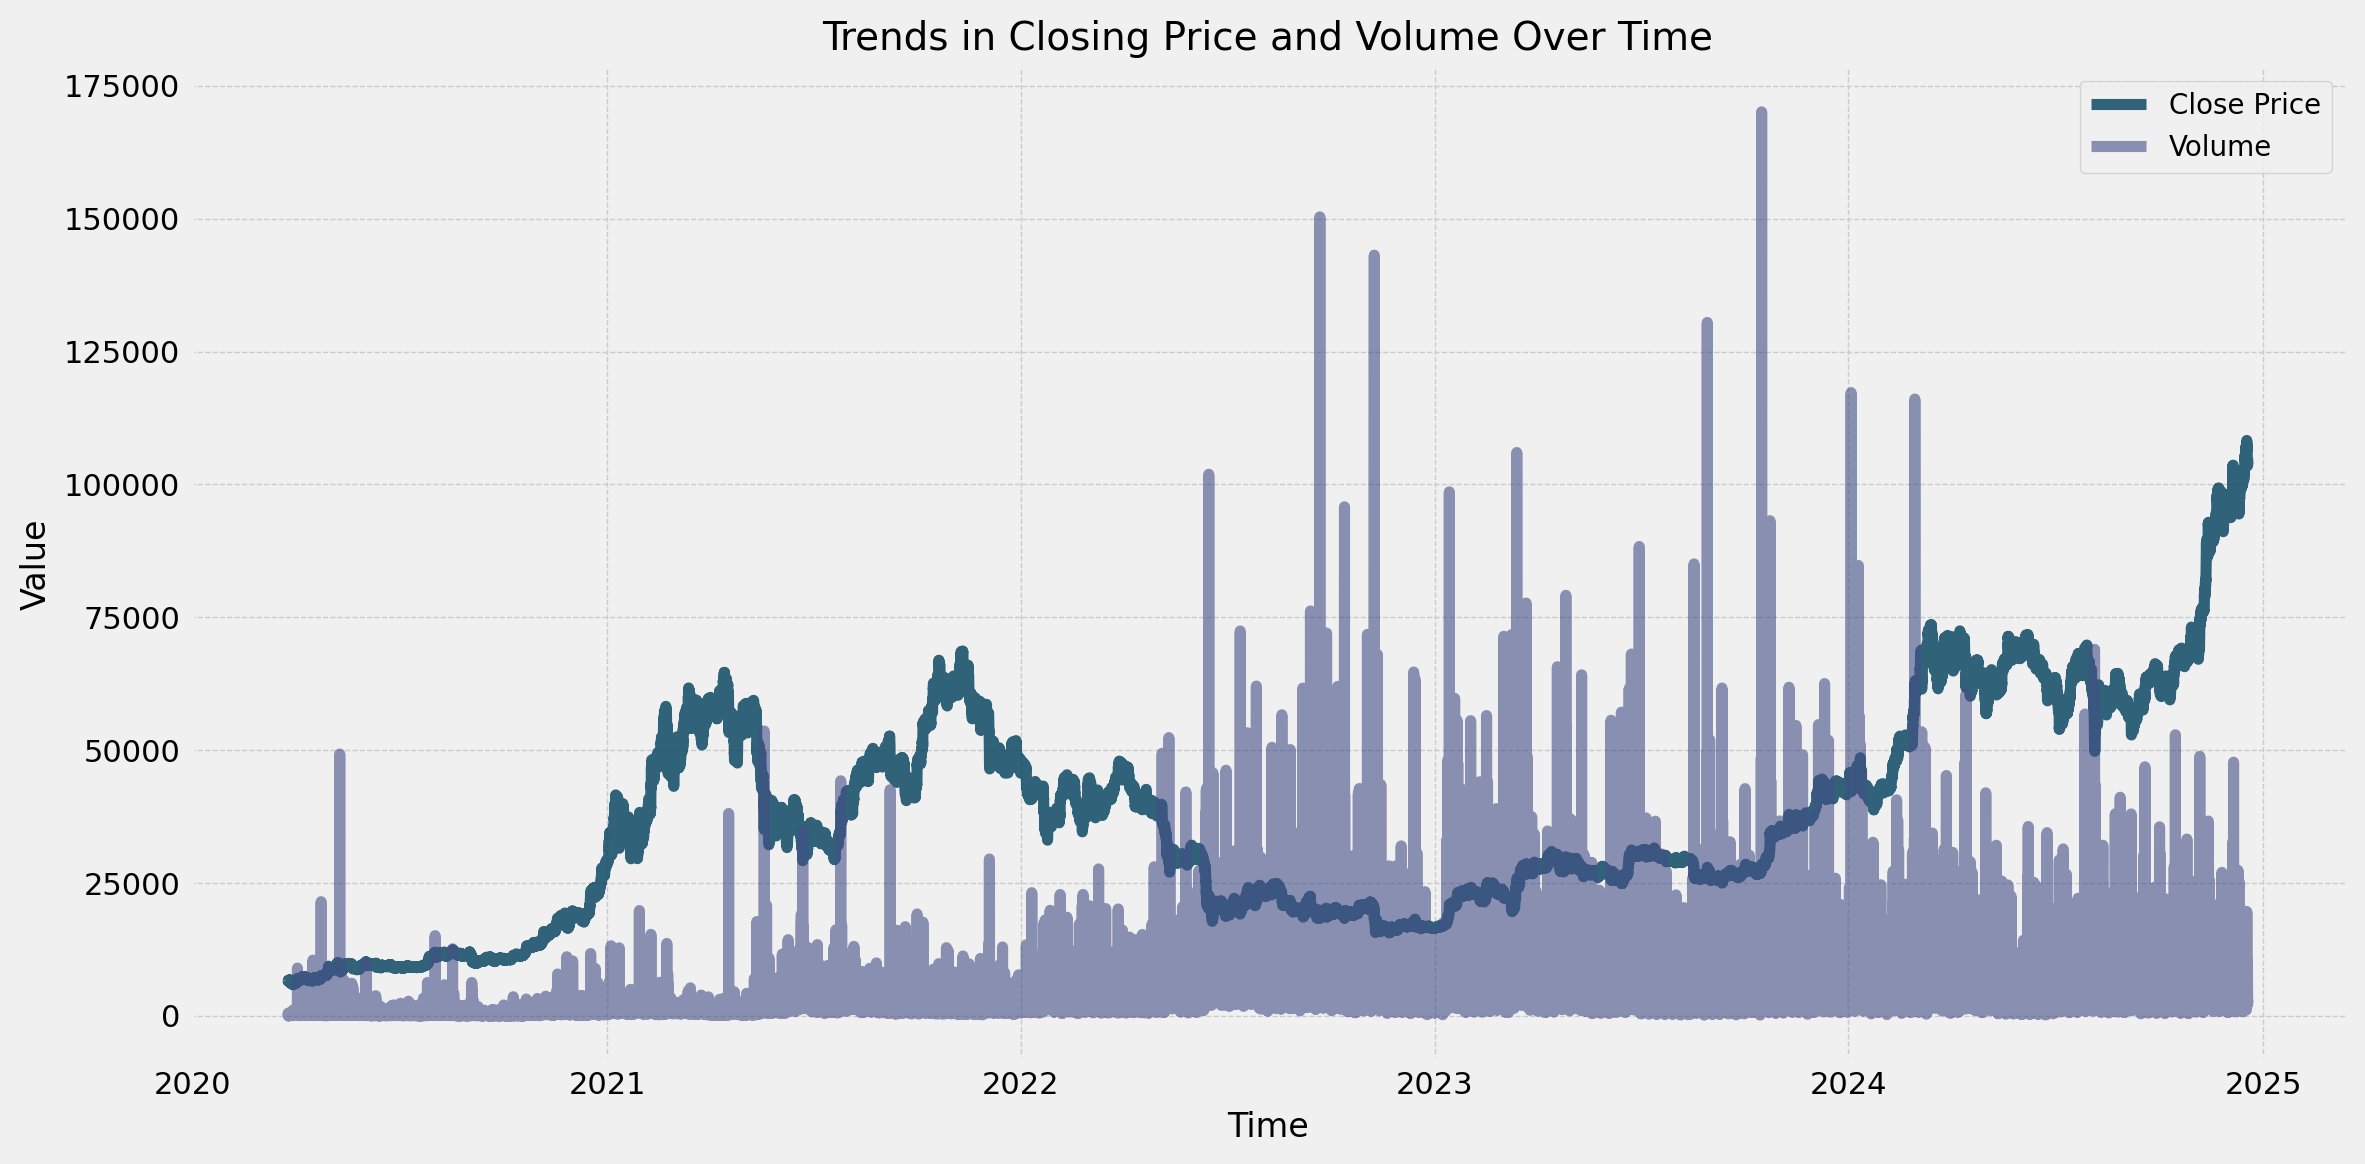

In [136]:
# Convert 'time' column to datetime for time-series analysis
# df['time'] = pd.to_datetime(df['time'])

# Setting up the figure size for clear visibility
plt.figure(figsize=(12, 6))

# Visualizing trends for key metrics
# Plotting closing prices over time
plt.plot(df['time'], df['close_price'], label='Close Price', alpha=0.8)

# Plotting trading volume over time
plt.plot(df['time'], df['volume'], label='Volume', alpha=0.6)

# Enhancing the plot with titles and labels
plt.title('Trends in Closing Price and Volume Over Time', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

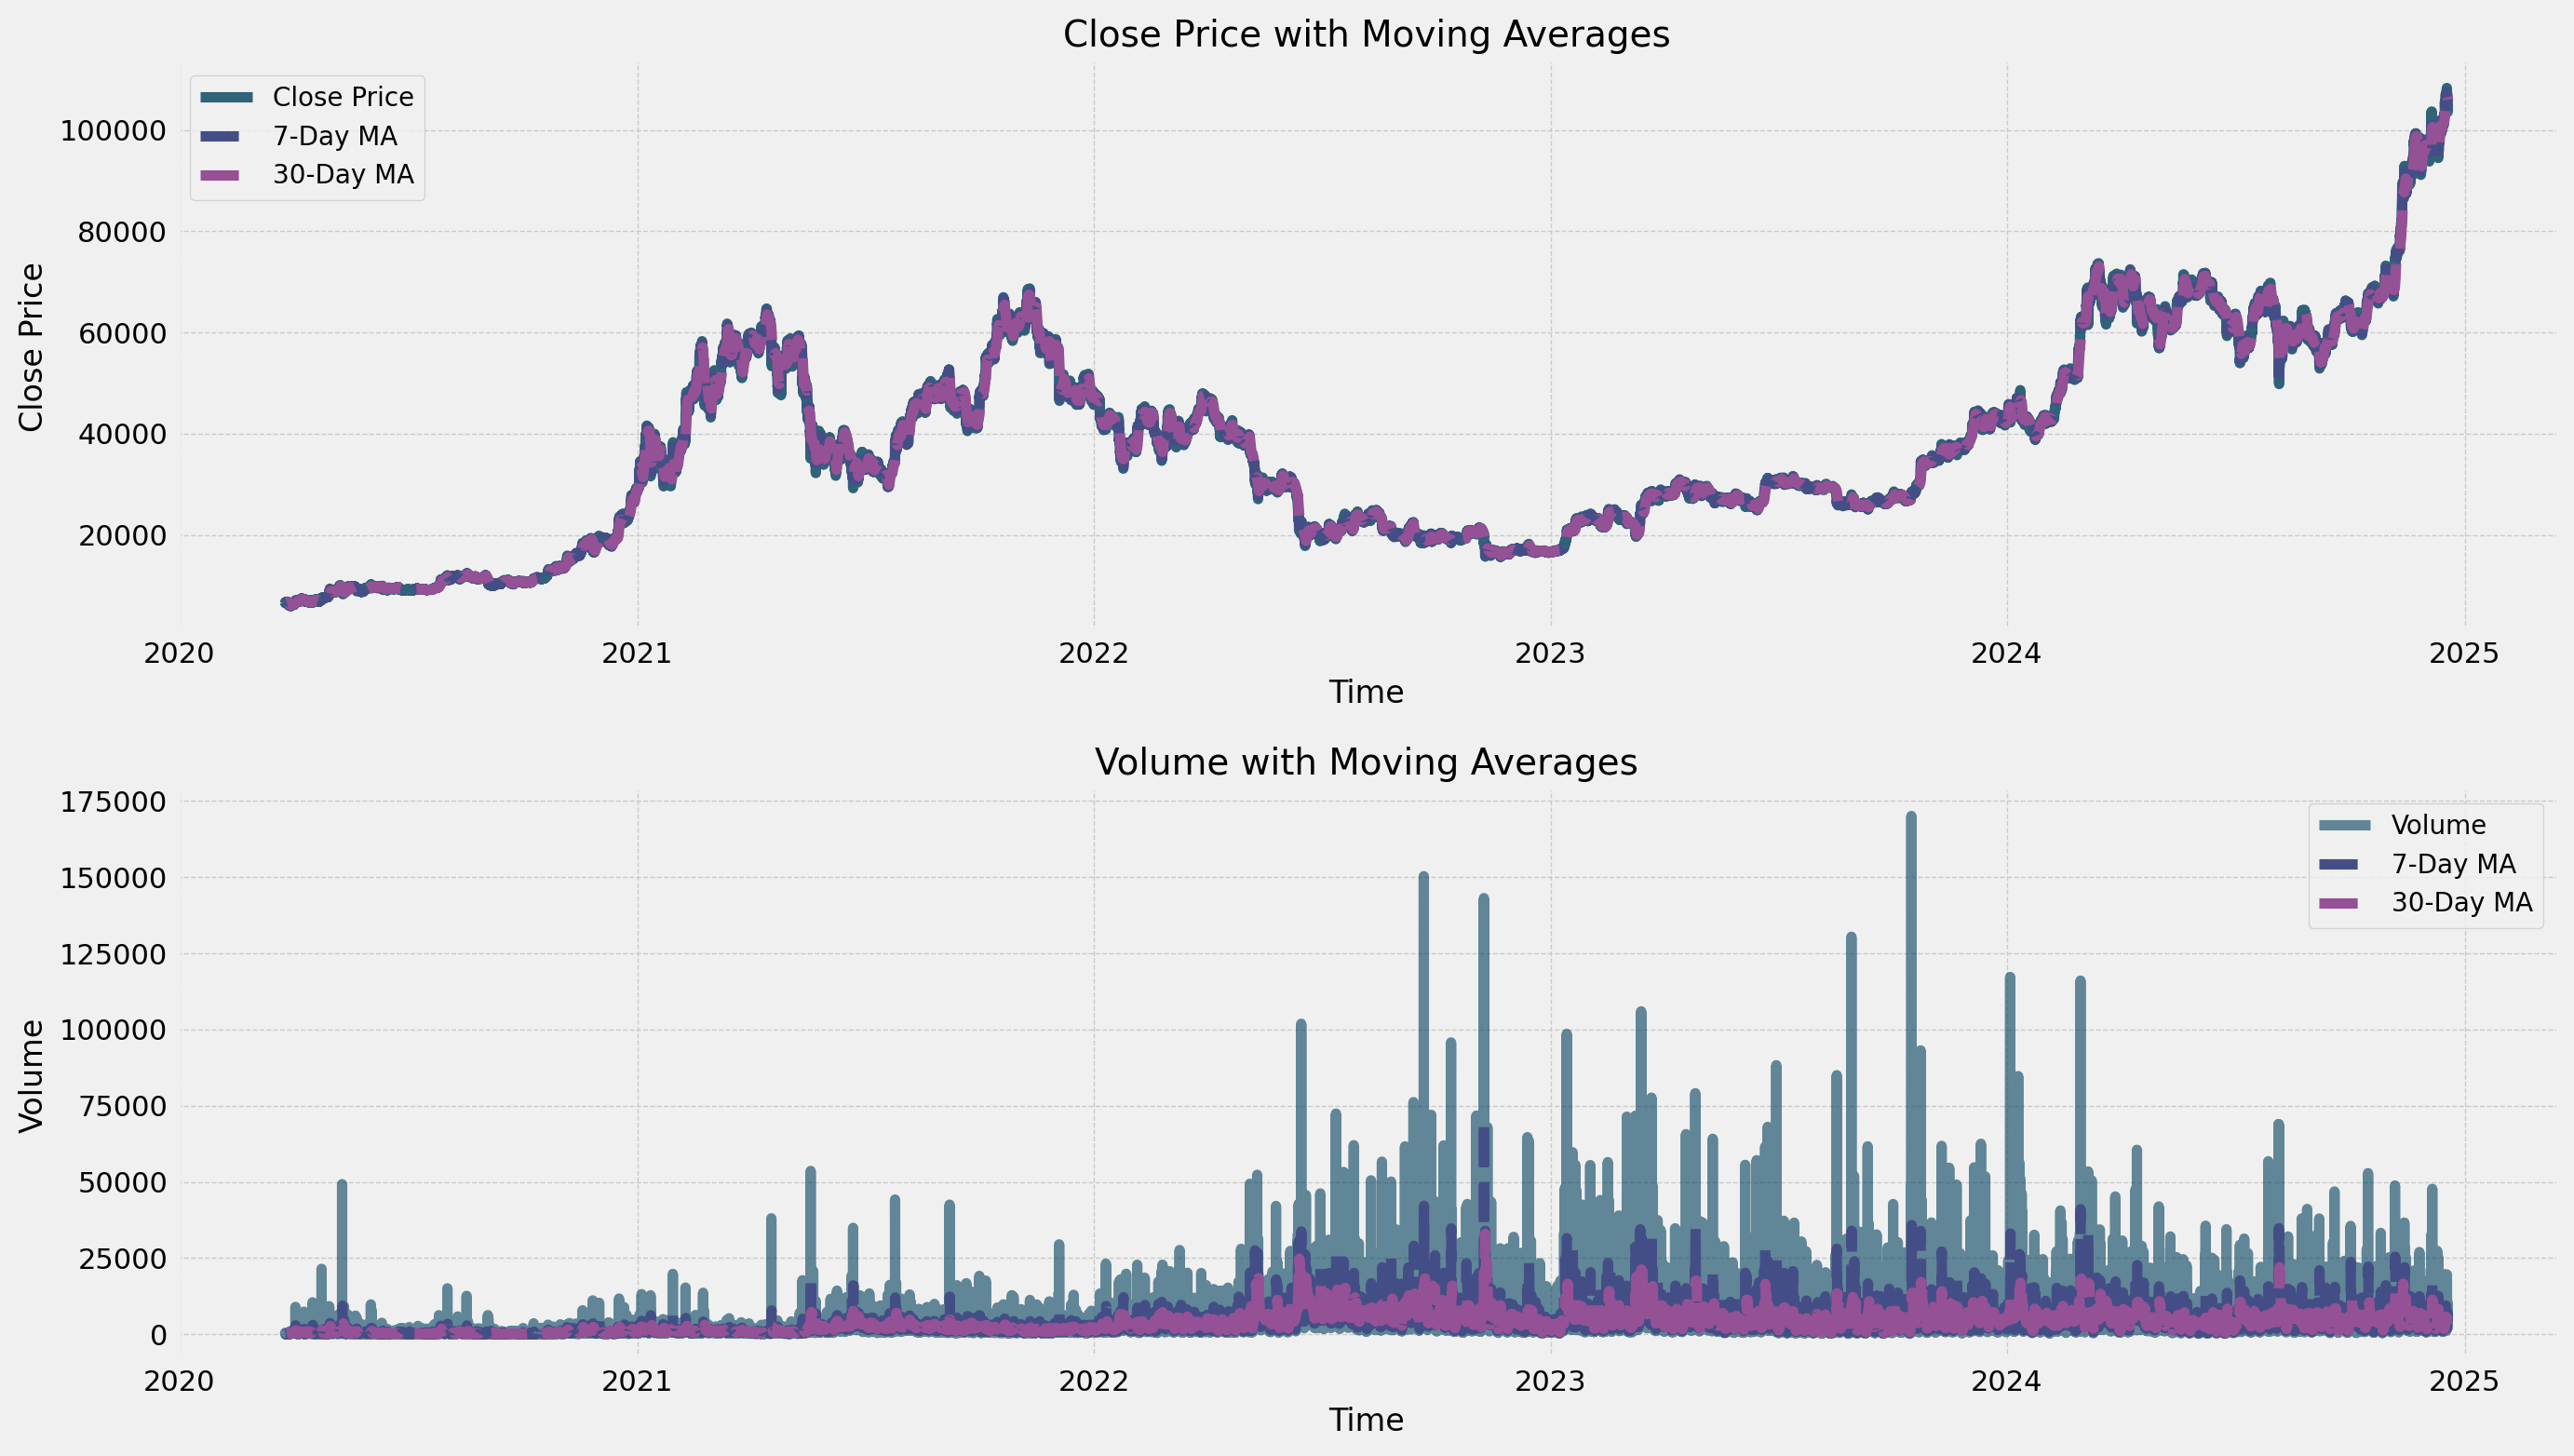

In [137]:
# Performing a deeper trend analysis by calculate moving averages and visualize them alongside raw df.
# Adding a 7-day moving average and a 30-day moving average for the 'close_price' and 'volume' columns.

# Calculating moving averages
df['close_price_MA7'] = df['close_price'].rolling(window=7).mean()
df['close_price_MA30'] = df['close_price'].rolling(window=30).mean()
df['volume_MA7'] = df['volume'].rolling(window=7).mean()
df['volume_MA30'] = df['volume'].rolling(window=30).mean()

# Plotting the trends with moving averages
plt.figure(figsize=(14, 8))

# Plot for closing prices
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['close_price'], label='Close Price', alpha=0.8)
plt.plot(df['time'], df['close_price_MA7'], label='7-Day MA', linestyle='--')
plt.plot(df['time'], df['close_price_MA30'], label='30-Day MA', linestyle='--')
plt.title('Close Price with Moving Averages', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot for trading volume
plt.subplot(2, 1, 2)
plt.plot(df['time'], df['volume'], label='Volume', alpha=0.6)
plt.plot(df['time'], df['volume_MA7'], label='7-Day MA', linestyle='--')
plt.plot(df['time'], df['volume_MA30'], label='30-Day MA', linestyle='--')
plt.title('Volume with Moving Averages', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

1. Close Price Analysis:
- Raw Close Price (solid line) shows the actual price movements.
- 7-Day Moving Average (dashed line) smooths out short-term fluctuations.
- 30-Day Moving Average (dashed line) highlights longer-term trends.

2. Volume Analysis:
- Raw Volume (solid line) shows trading activity levels.
- 7-Day Moving Average captures short-term volume trends.
- 30-Day Moving Average reveals sustained trends in trading activity.

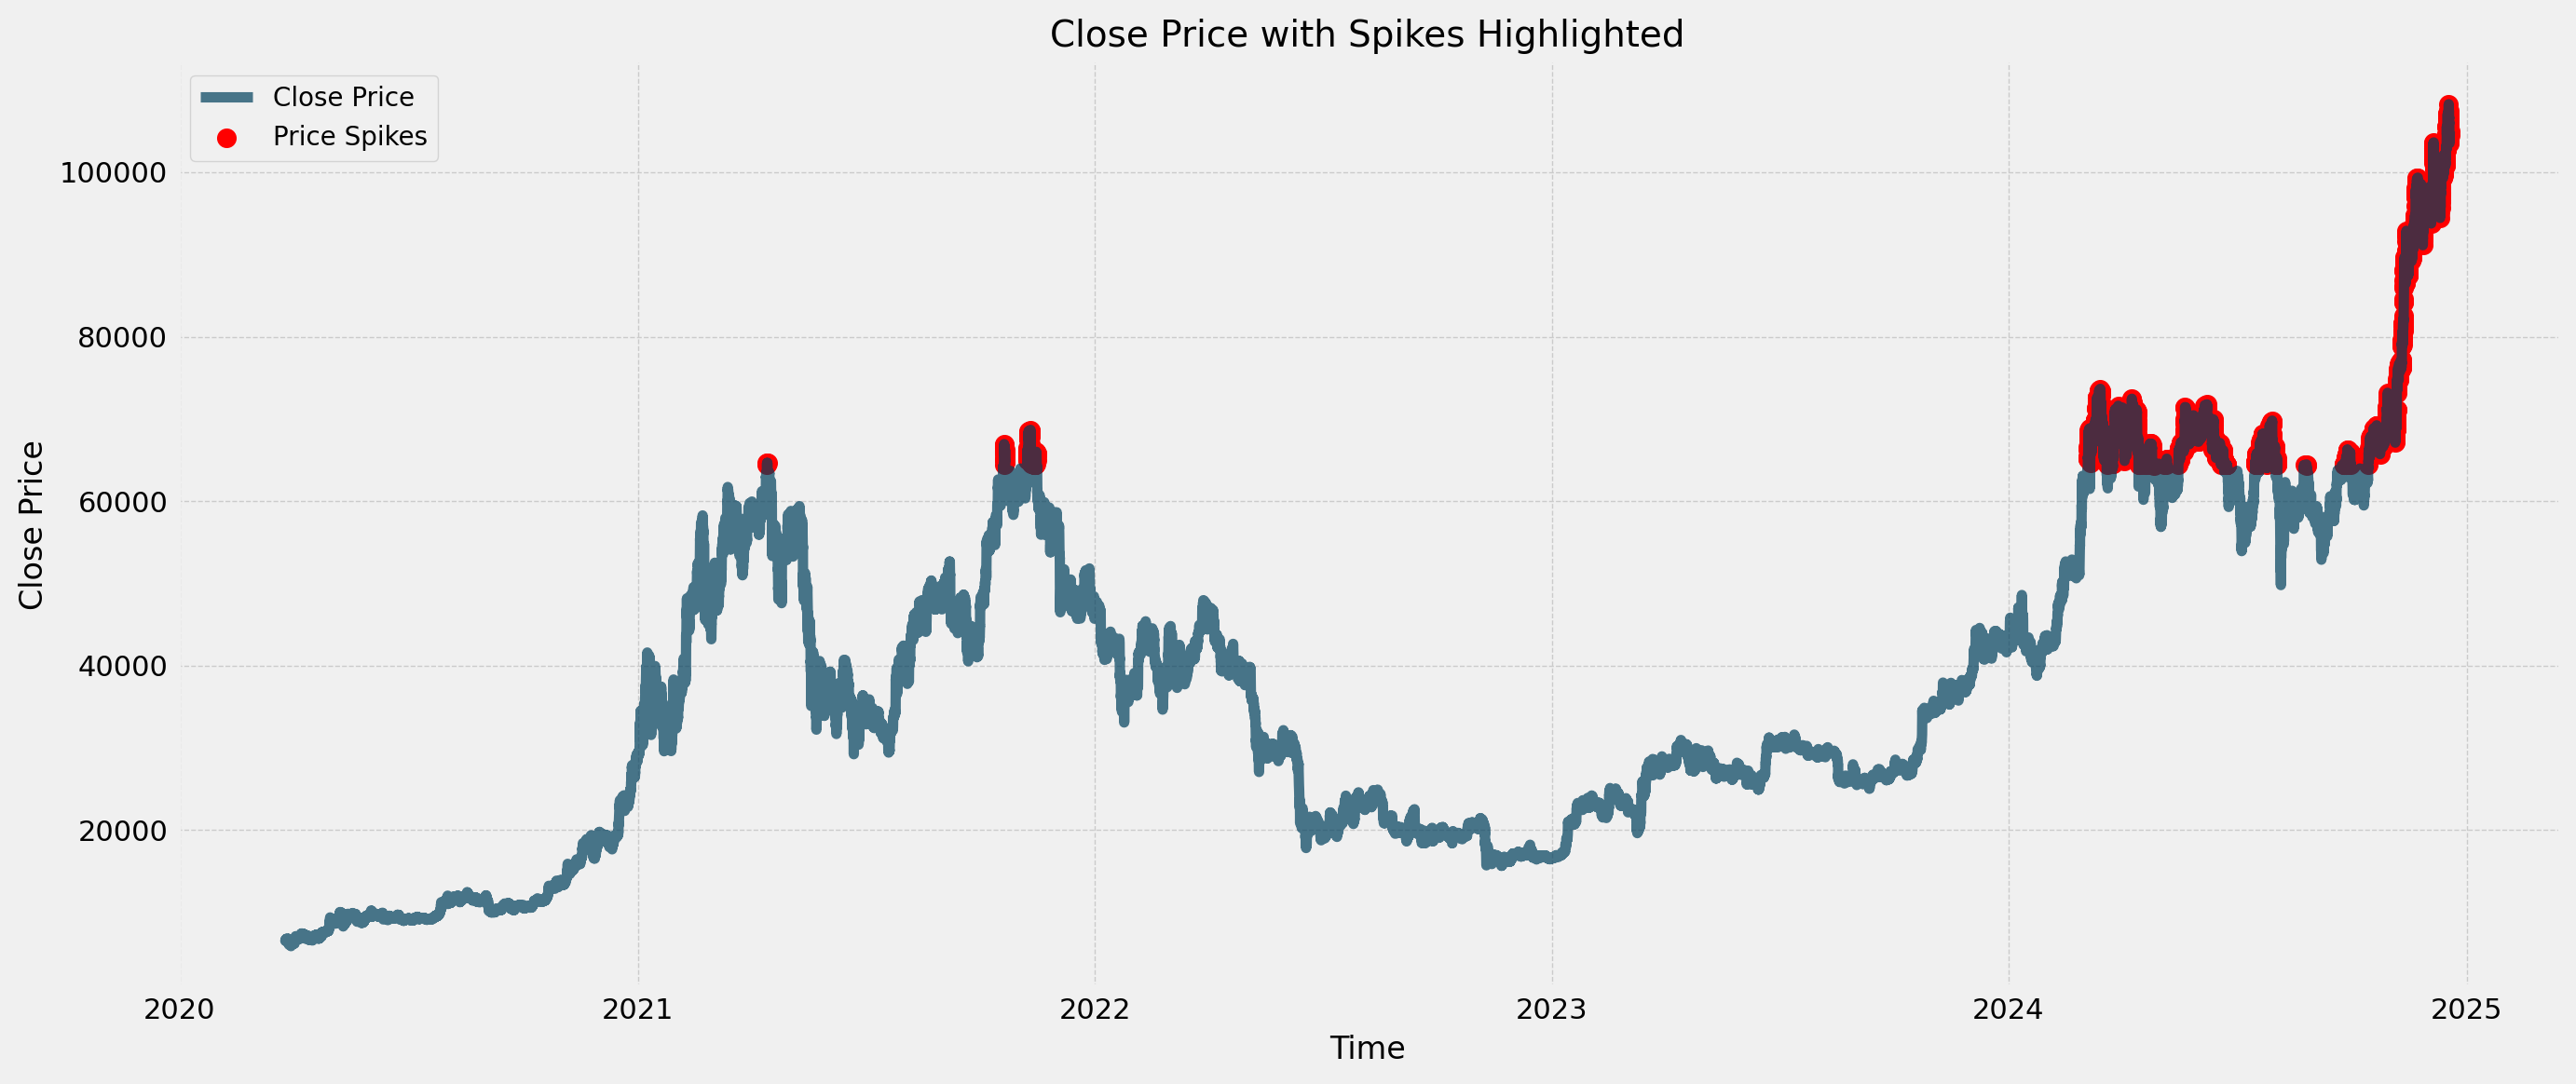

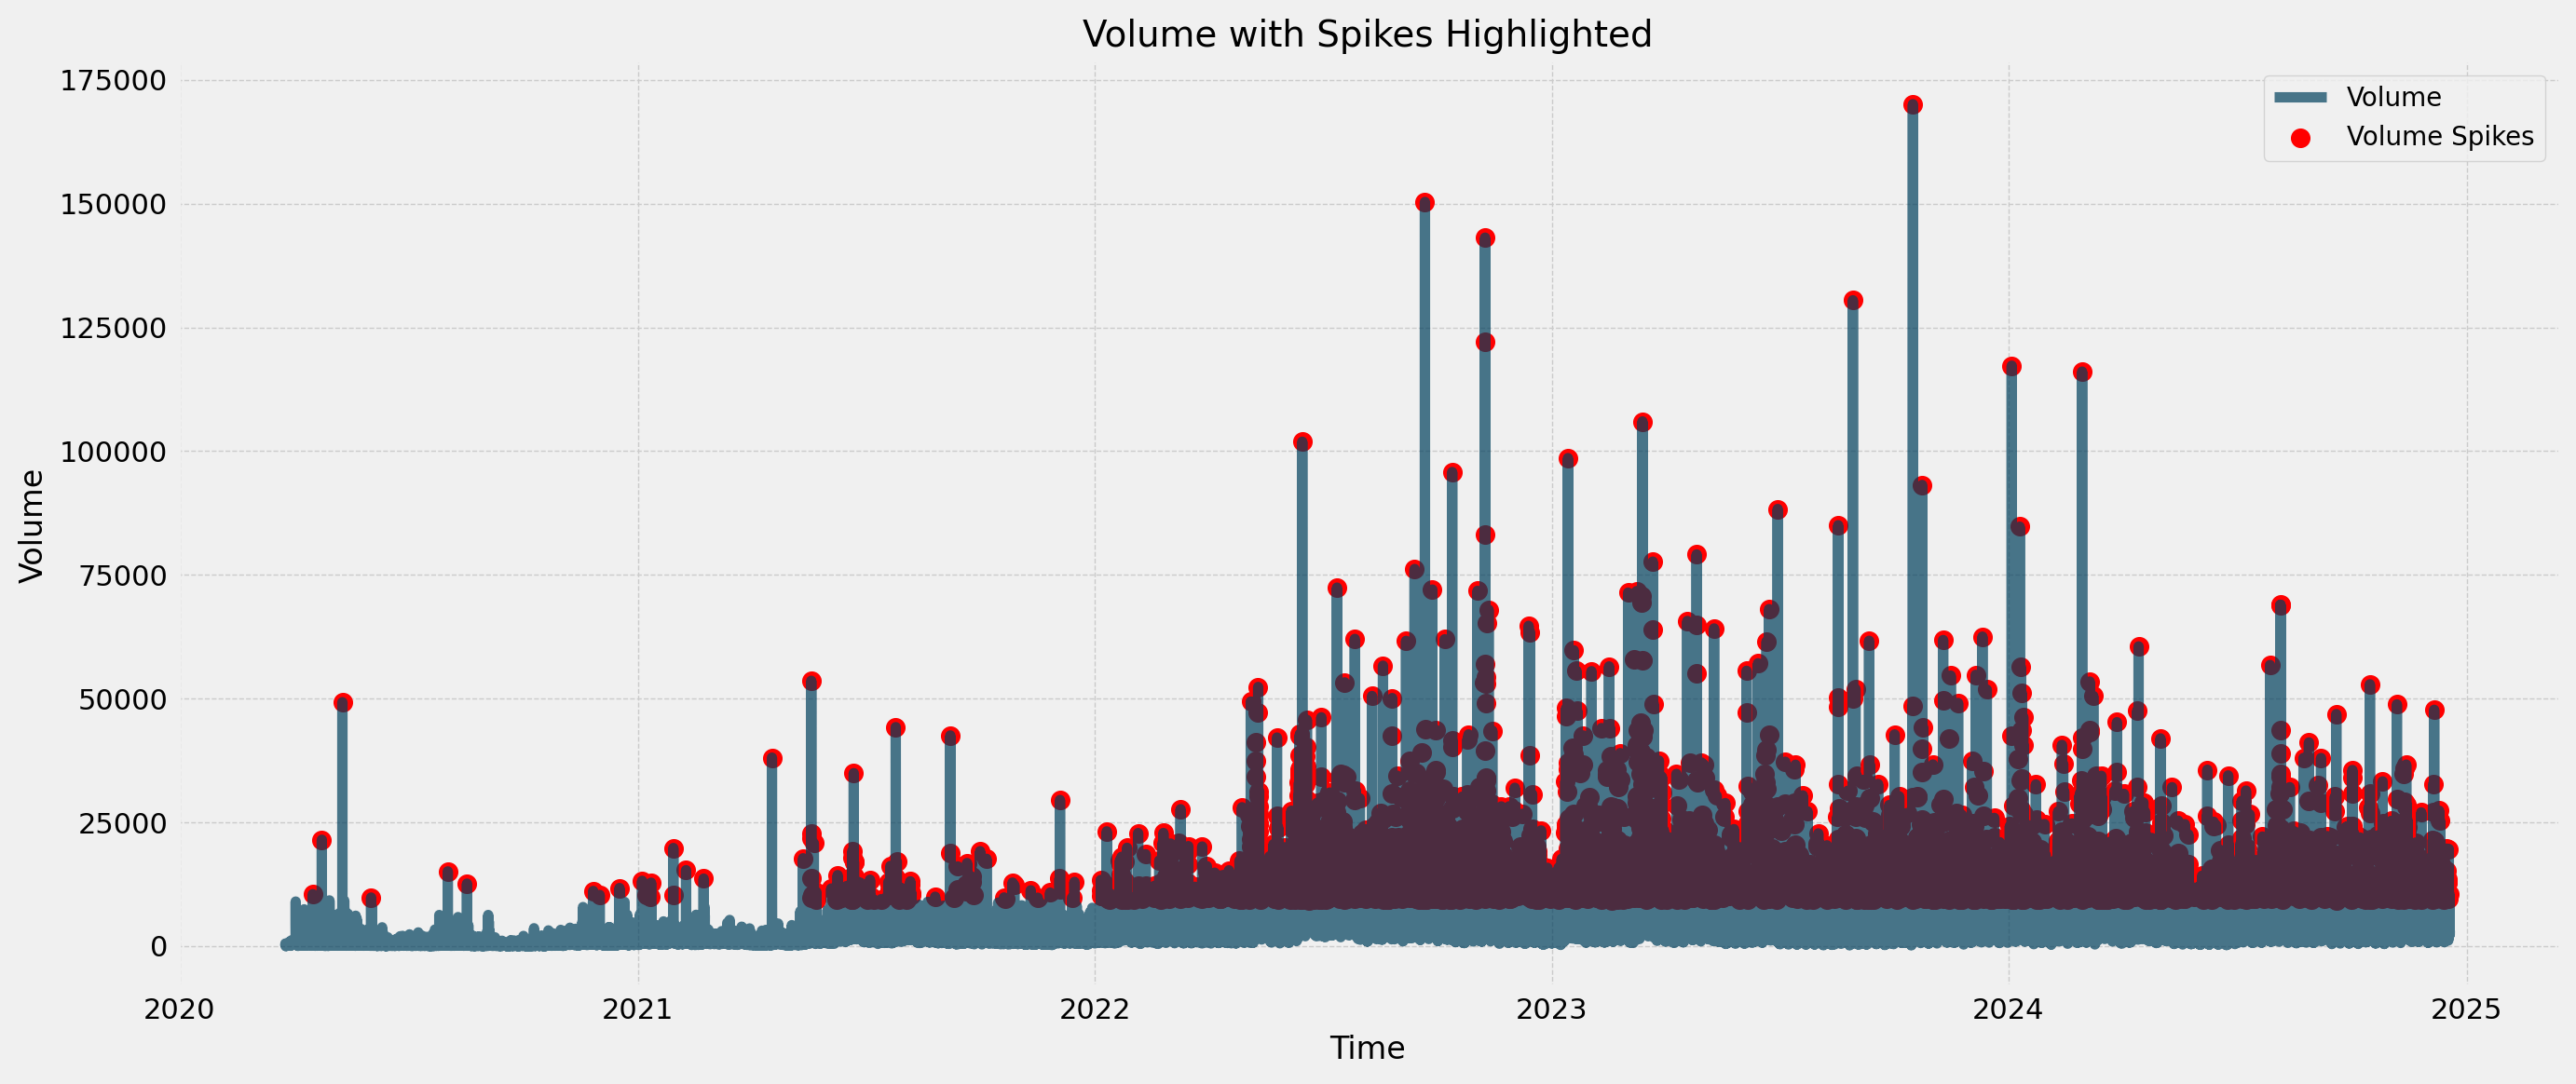

In [138]:
# Identifying anomalies and spikes in the close price and volume data

# Thresholds for anomalies (spikes higher than the 90th percentile)
close_price_threshold = df['close_price'].quantile(0.90)
volume_threshold = df['volume'].quantile(0.90)

# Filtering anomalies
price_anomalies = df[df['close_price'] > close_price_threshold]
volume_anomalies = df[df['volume'] > volume_threshold]

# Plotting close price with anomalies highlighted
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['close_price'], label='Close Price', alpha=0.7)
plt.scatter(price_anomalies['time'], price_anomalies['close_price'], color='red', label='Price Spikes', s=50)
plt.title('Close Price with Spikes Highlighted', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plotting volume with anomalies highlighted
plt.figure(figsize=(14, 6))
plt.plot(df['time'], df['volume'], label='Volume', alpha=0.7)
plt.scatter(volume_anomalies['time'], volume_anomalies['volume'], color='red', label='Volume Spikes', s=50)
plt.title('Volume with Spikes Highlighted', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Providing details on anomalies
price_anomalies_summary = price_anomalies[['time', 'close_price']].copy()
volume_anomalies_summary = volume_anomalies[['time', 'volume']].copy()


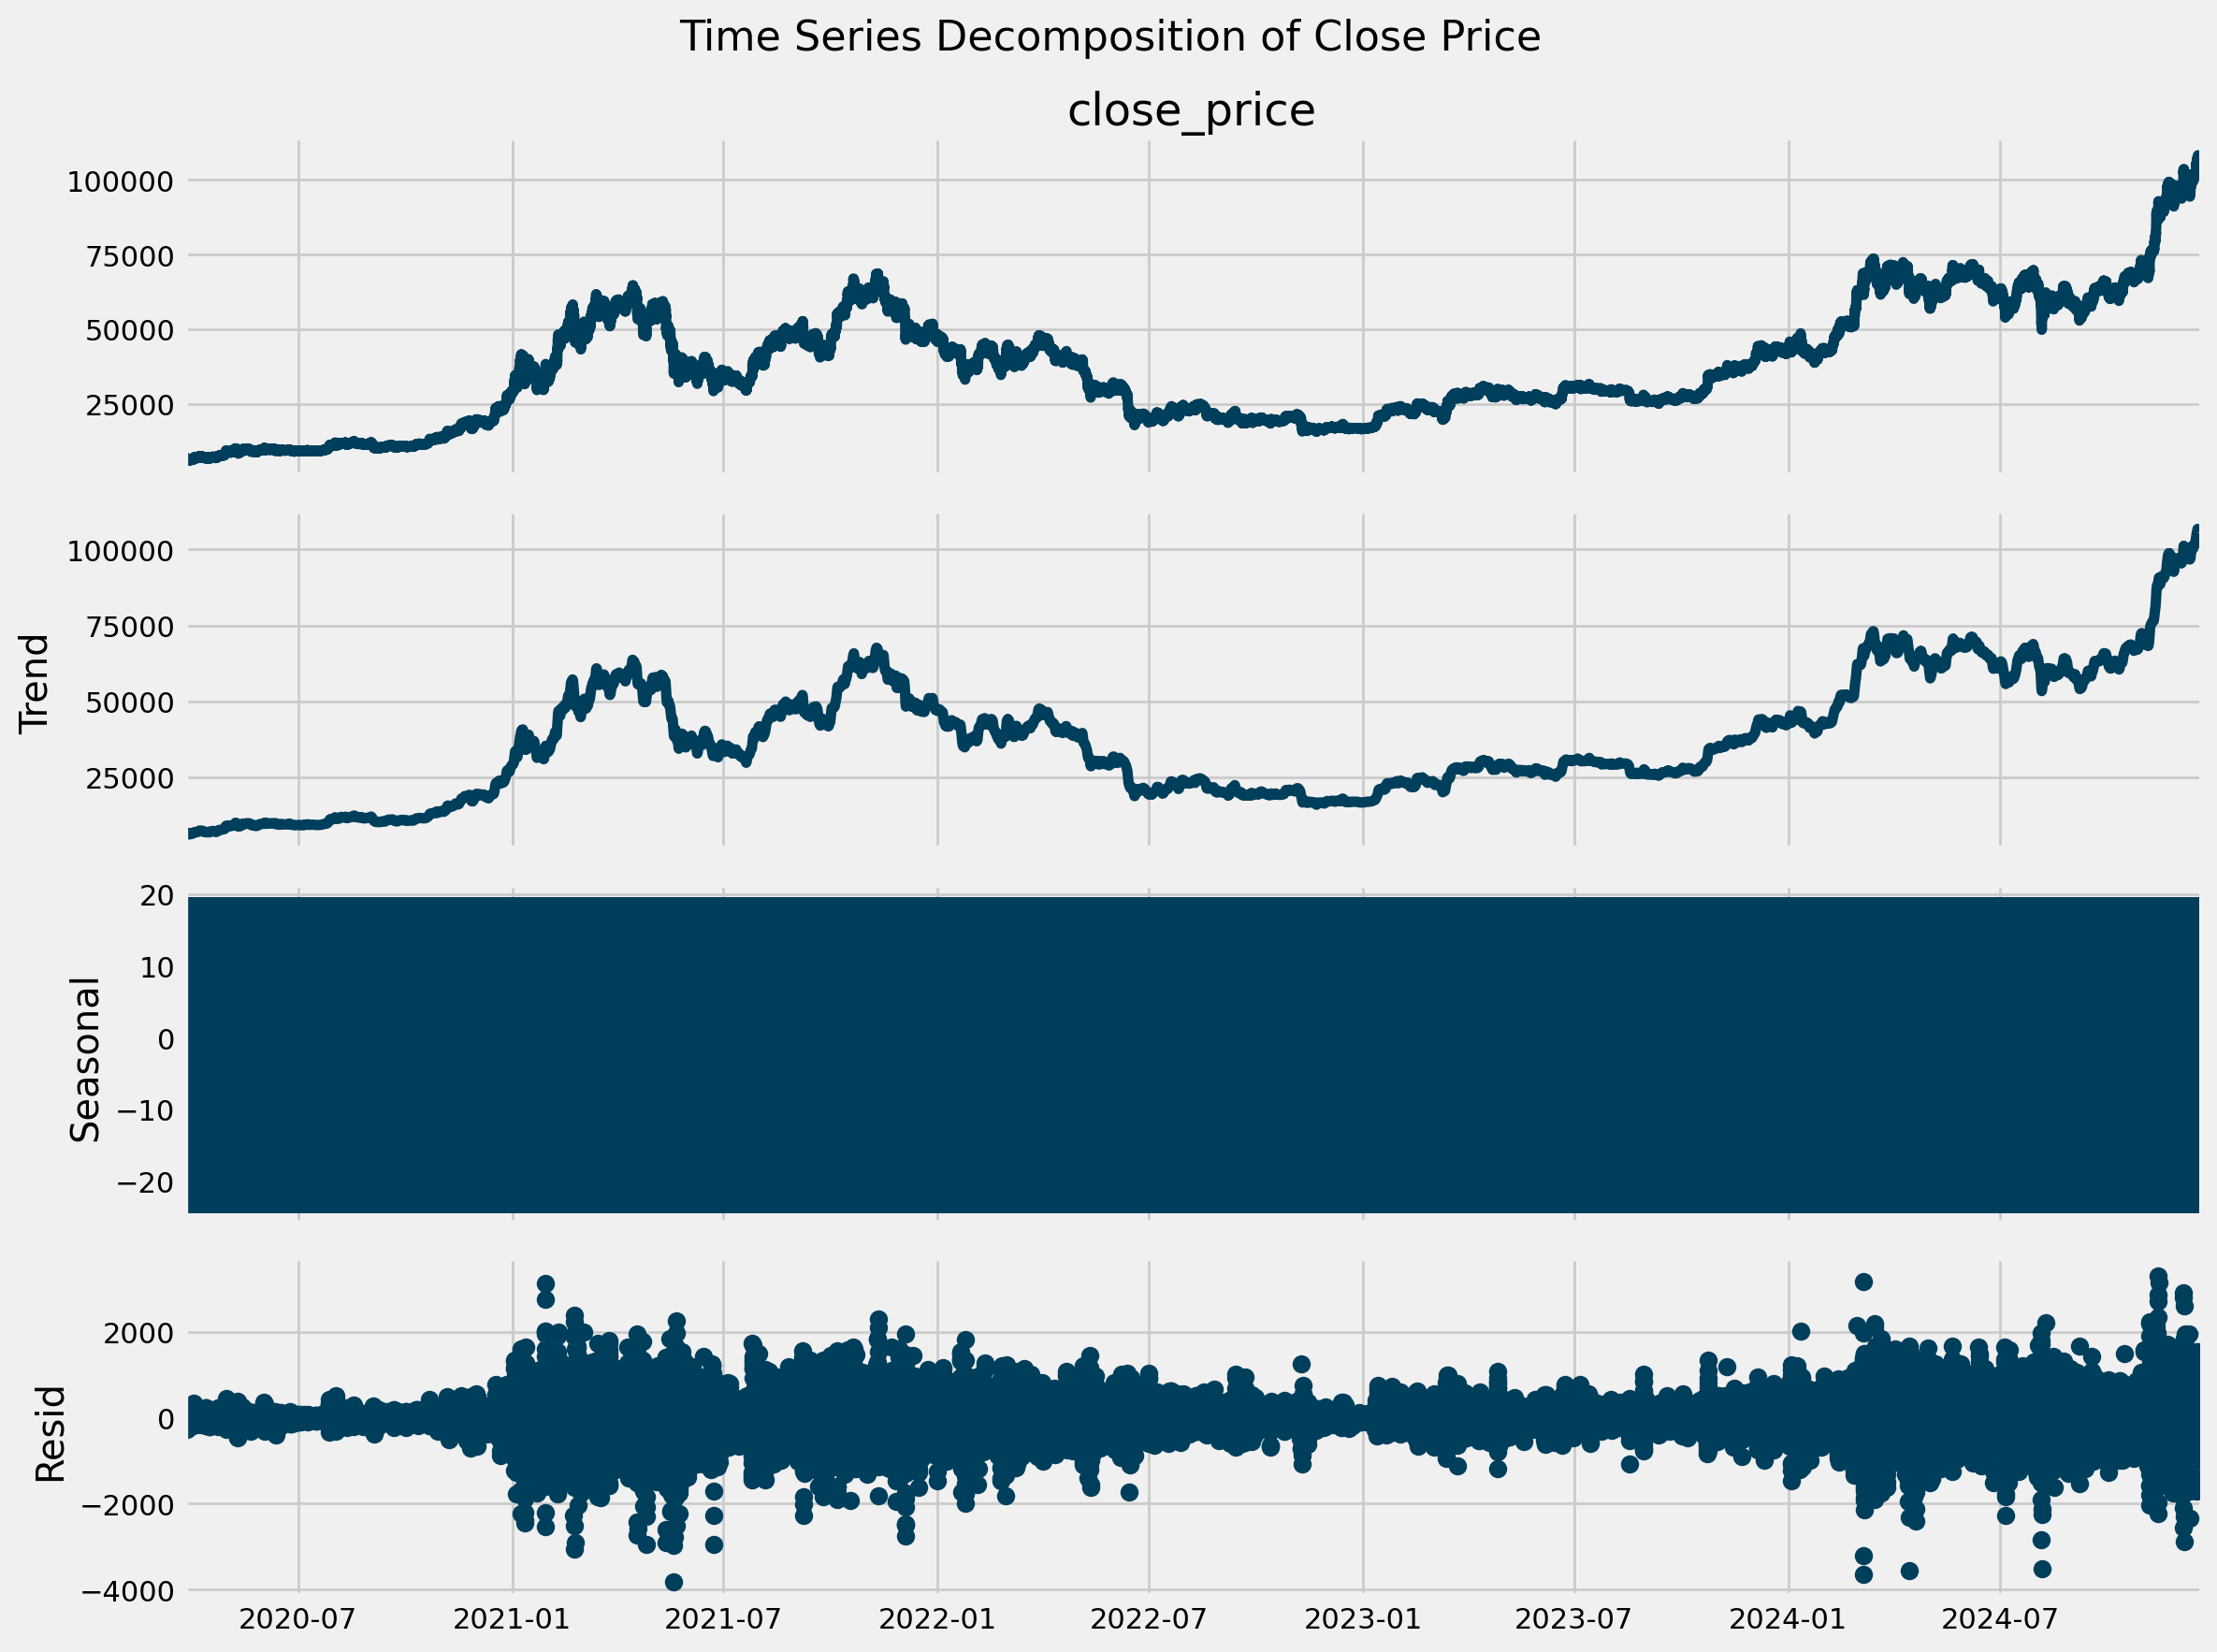

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose

df.set_index('time', inplace=True)
df.sort_index(inplace=True)

# Performing seasonal decomposition on the 'close_price' column
decomposition = seasonal_decompose(df['close_price'], model='additive', period=24)  # Assuming hourly data

# Plotting the decomposed components
plt.rcParams.update({'figure.figsize': (12, 9)})
decomposition.plot()
plt.suptitle('Time Series Decomposition of Close Price', fontsize=16)
plt.tight_layout()
plt.show()

### Correlation Analysis

In [28]:
# Correlation analysis
correlation_matrix = df.corr()

price_corr = correlation_matrix['close_price'].sort_values(ascending=False)

price_corr.head(10), price_corr.tail(10)

(close_price         1.000
 high_price          1.000
 low_price           1.000
 open_price          1.000
 open_interest       0.843
 difficulty          0.640
 time                0.567
 blockreward_usd     0.565
 taker_sell_volume   0.301
 taker_buy_volume    0.297
 Name: close_price, dtype: float64,
 fees_transaction_mean          -0.103
 transactions_count_inflow.1    -0.110
 fees_transaction_median        -0.135
 addresses_count_receiver       -0.142
 estimated_leverage_ratio       -0.159
 transactions_count_outflow.1   -0.246
 blockreward                    -0.311
 exchange_supply_ratio          -0.337
 tokens_transferred_median      -0.553
 miner_supply_ratio             -0.713
 Name: close_price, dtype: float64)

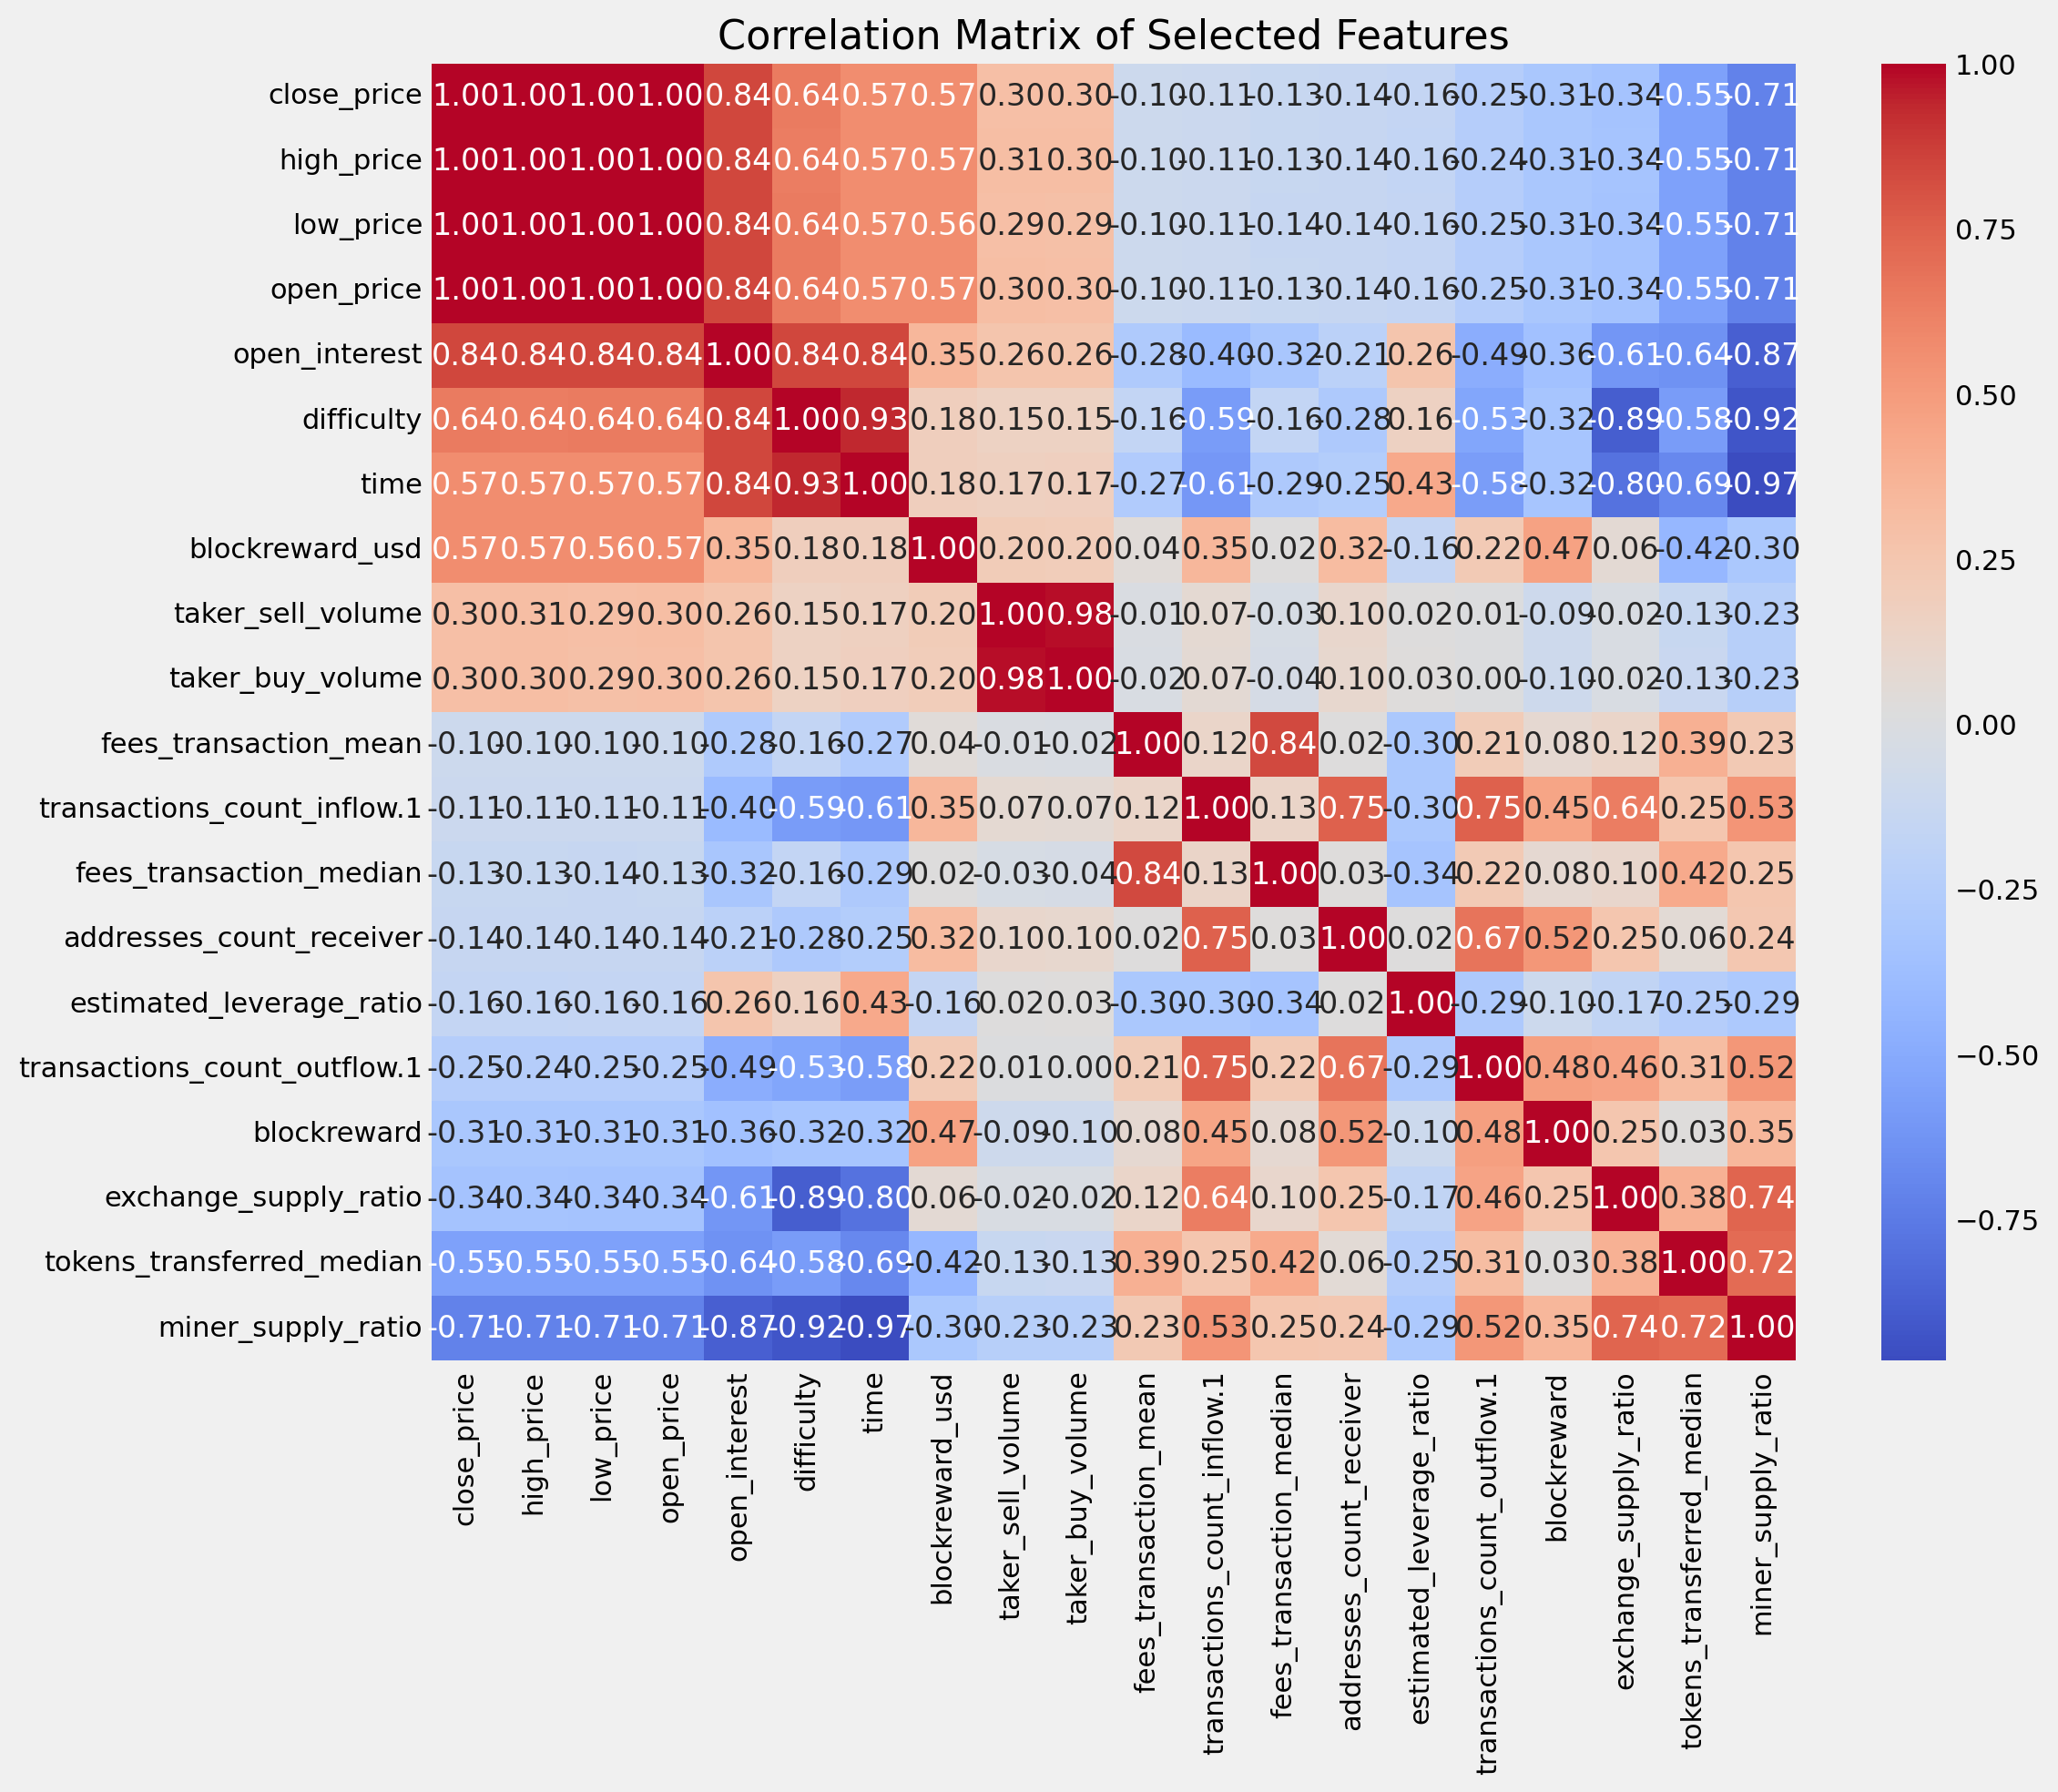

In [29]:
# Plotting the correlation matrix
# Selecting the top 10 and bottom 10 correlated features with 'close_price'
selected_features = price_corr.head(10).index.tolist() + price_corr.tail(10).index.tolist()

plt.figure(figsize=(12, 10))
heatmap = df[selected_features].corr()
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.tight_layout()
plt.show()

In [30]:
price_corr

close_price                             1.000
high_price                              1.000
low_price                               1.000
open_price                              1.000
open_interest                           0.843
difficulty                              0.640
time                                    0.567
blockreward_usd                         0.565
taker_sell_volume                       0.301
taker_buy_volume                        0.297
transactions_count_outflow              0.288
addresses_count_inflow                  0.219
fees_transaction_median_usd             0.178
exchange_whale_ratio                    0.172
fees_transaction_mean_usd               0.166
coinbase_premium_gap                    0.153
addresses_count_outflow                 0.119
addresses_count_sender                  0.105
volume                                  0.046
short_liquidations_usd                  0.045
taker_sell_ratio                        0.039
transactions_count_inflow         

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41324 entries, 0 to 41497
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   time                                  41324 non-null  datetime64[ns]
 1   difficulty                            41324 non-null  float64       
 2   estimated_leverage_ratio              41324 non-null  float64       
 3   addresses_count_active                41324 non-null  int64         
 4   addresses_count_sender                41324 non-null  int64         
 5   addresses_count_receiver              41324 non-null  int64         
 6   exchange_whale_ratio                  41324 non-null  float64       
 7   coinbase_premium_gap                  41324 non-null  float64       
 8   coinbase_premium_index                41324 non-null  float64       
 9   coinbase_premium_gap_usdt_adjusted    41324 non-null  float64       
 10  coi

In [51]:
multicollinearity = [
    # 'close_price'
    'high_price',
    'low_price',
    'open_price',
]
low_colleration = [
    # colleration less than 0.29 (very weak colleration)
    'taker_buy_volume',
    'transactions_count_outflow',
    'addresses_count_inflow',
    'fees_transaction_median_usd',
    'exchange_whale_ratio',
    'fees_transaction_mean_usd',
    'coinbase_premium_gap',
    'addresses_count_sender',
    'volume',
    'addresses_count_outflow',
    'short_liquidations_usd',
    'taker_sell_ratio',
    'transactions_count_inflow',
    'long_liquidations_usd',
    'coinbase_premium_gap_usdt_adjusted',
    'coinbase_premium_index_usdt_adjusted',
    'addresses_count_active',
    'coinbase_premium_index',
    'taker_buy_ratio',
    'tokens_transferred_total',
    'taker_buy_sell_ratio',
    'long_liquidations',
    'tokens_transferred_mean',
    'short_liquidations',
    'fees_transaction_mean',
    'transactions_count_inflow.1',
    'fees_transaction_median',
    'addresses_count_receiver',
    'estimated_leverage_ratio',
    'transactions_count_outflow.1'
]
# Duplicate Information
redundancy = [
    # 'blockreward_usd'
    'blockreward',
    # 'tokens_transferred_total',
    'tokens_transferred_median'
]

# Combine all columns to exclude
columns_to_exclude = set(multicollinearity + low_colleration + redundancy)

# Find remaining columns in the dataset
remaining_columns = [col for col in df.columns if col not in columns_to_exclude]

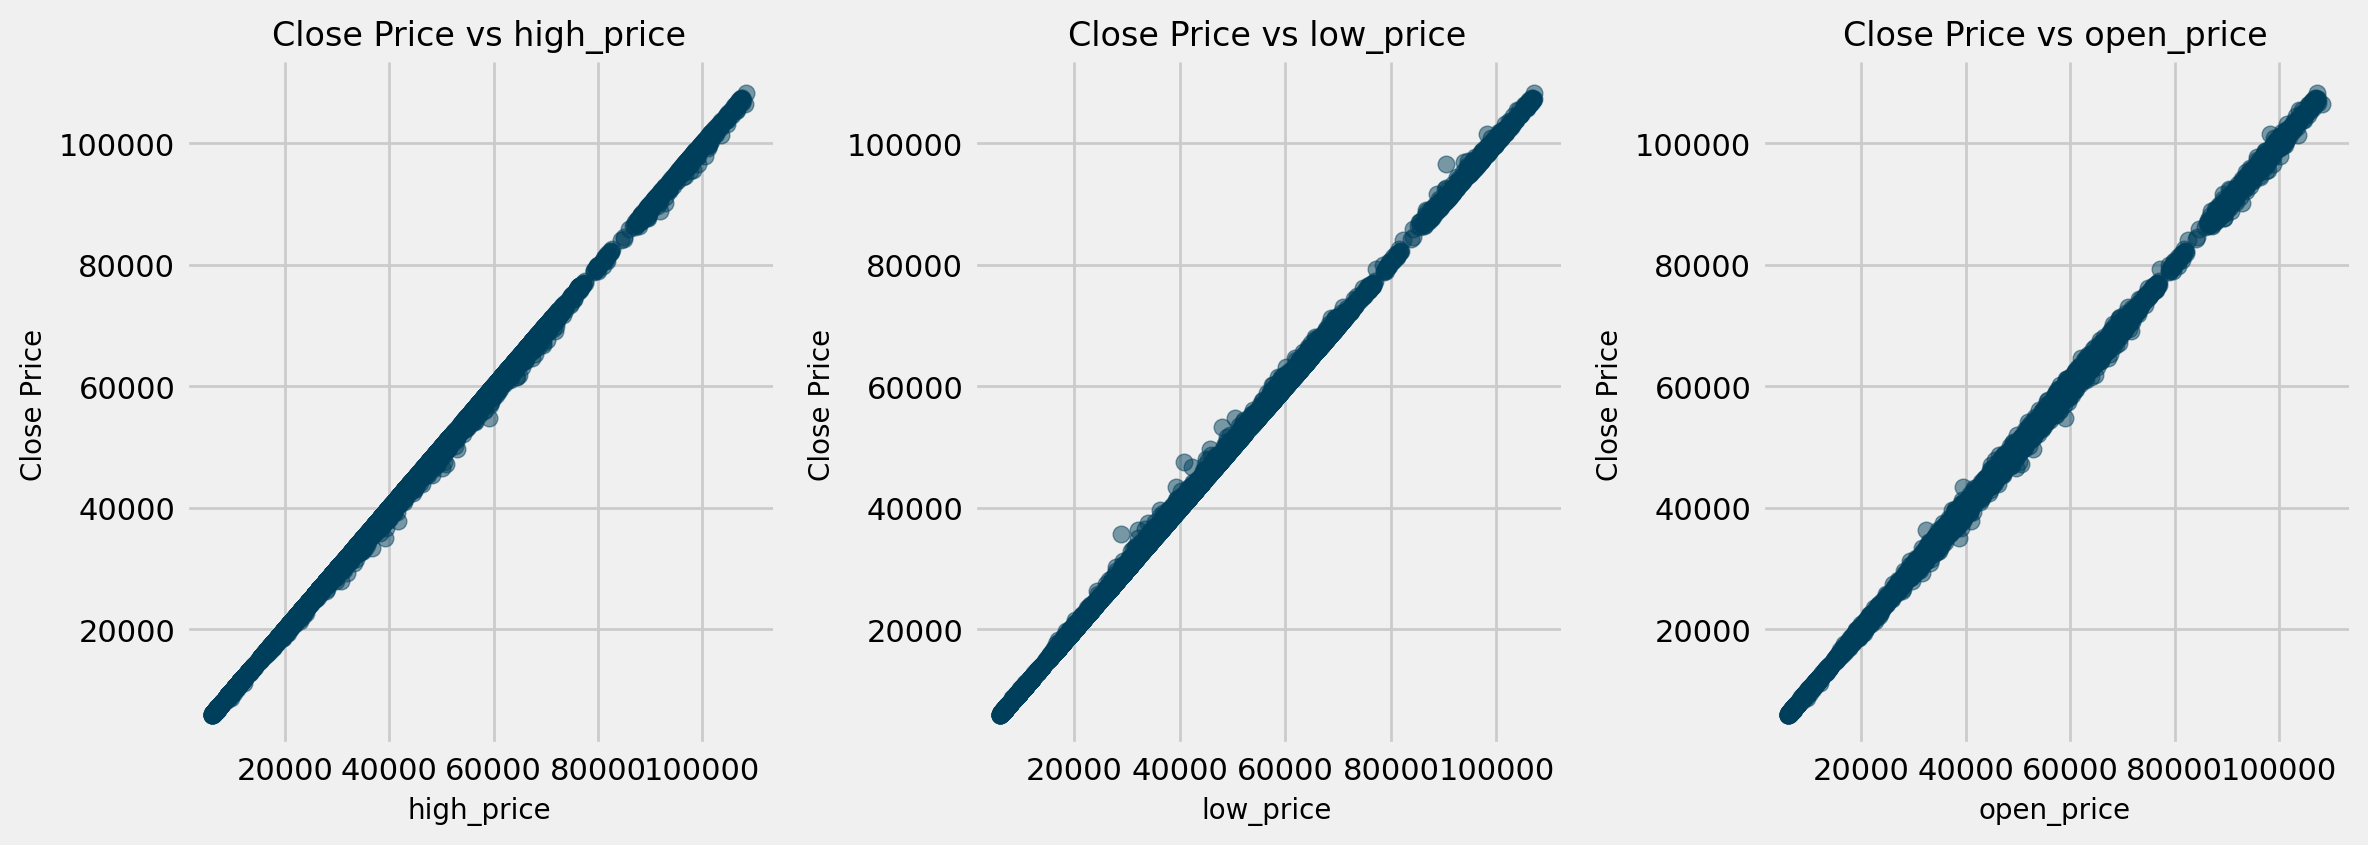

In [53]:
# Create scatter plots for these variables against close_price
plt.figure(figsize=(12, 12))

for i, var in enumerate(multicollinearity, start=1):
    plt.subplot(3, 3, i)
    plt.scatter(df[var], df['close_price'], alpha=0.5)
    plt.title(f'Close Price vs {var}', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Close Price', fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

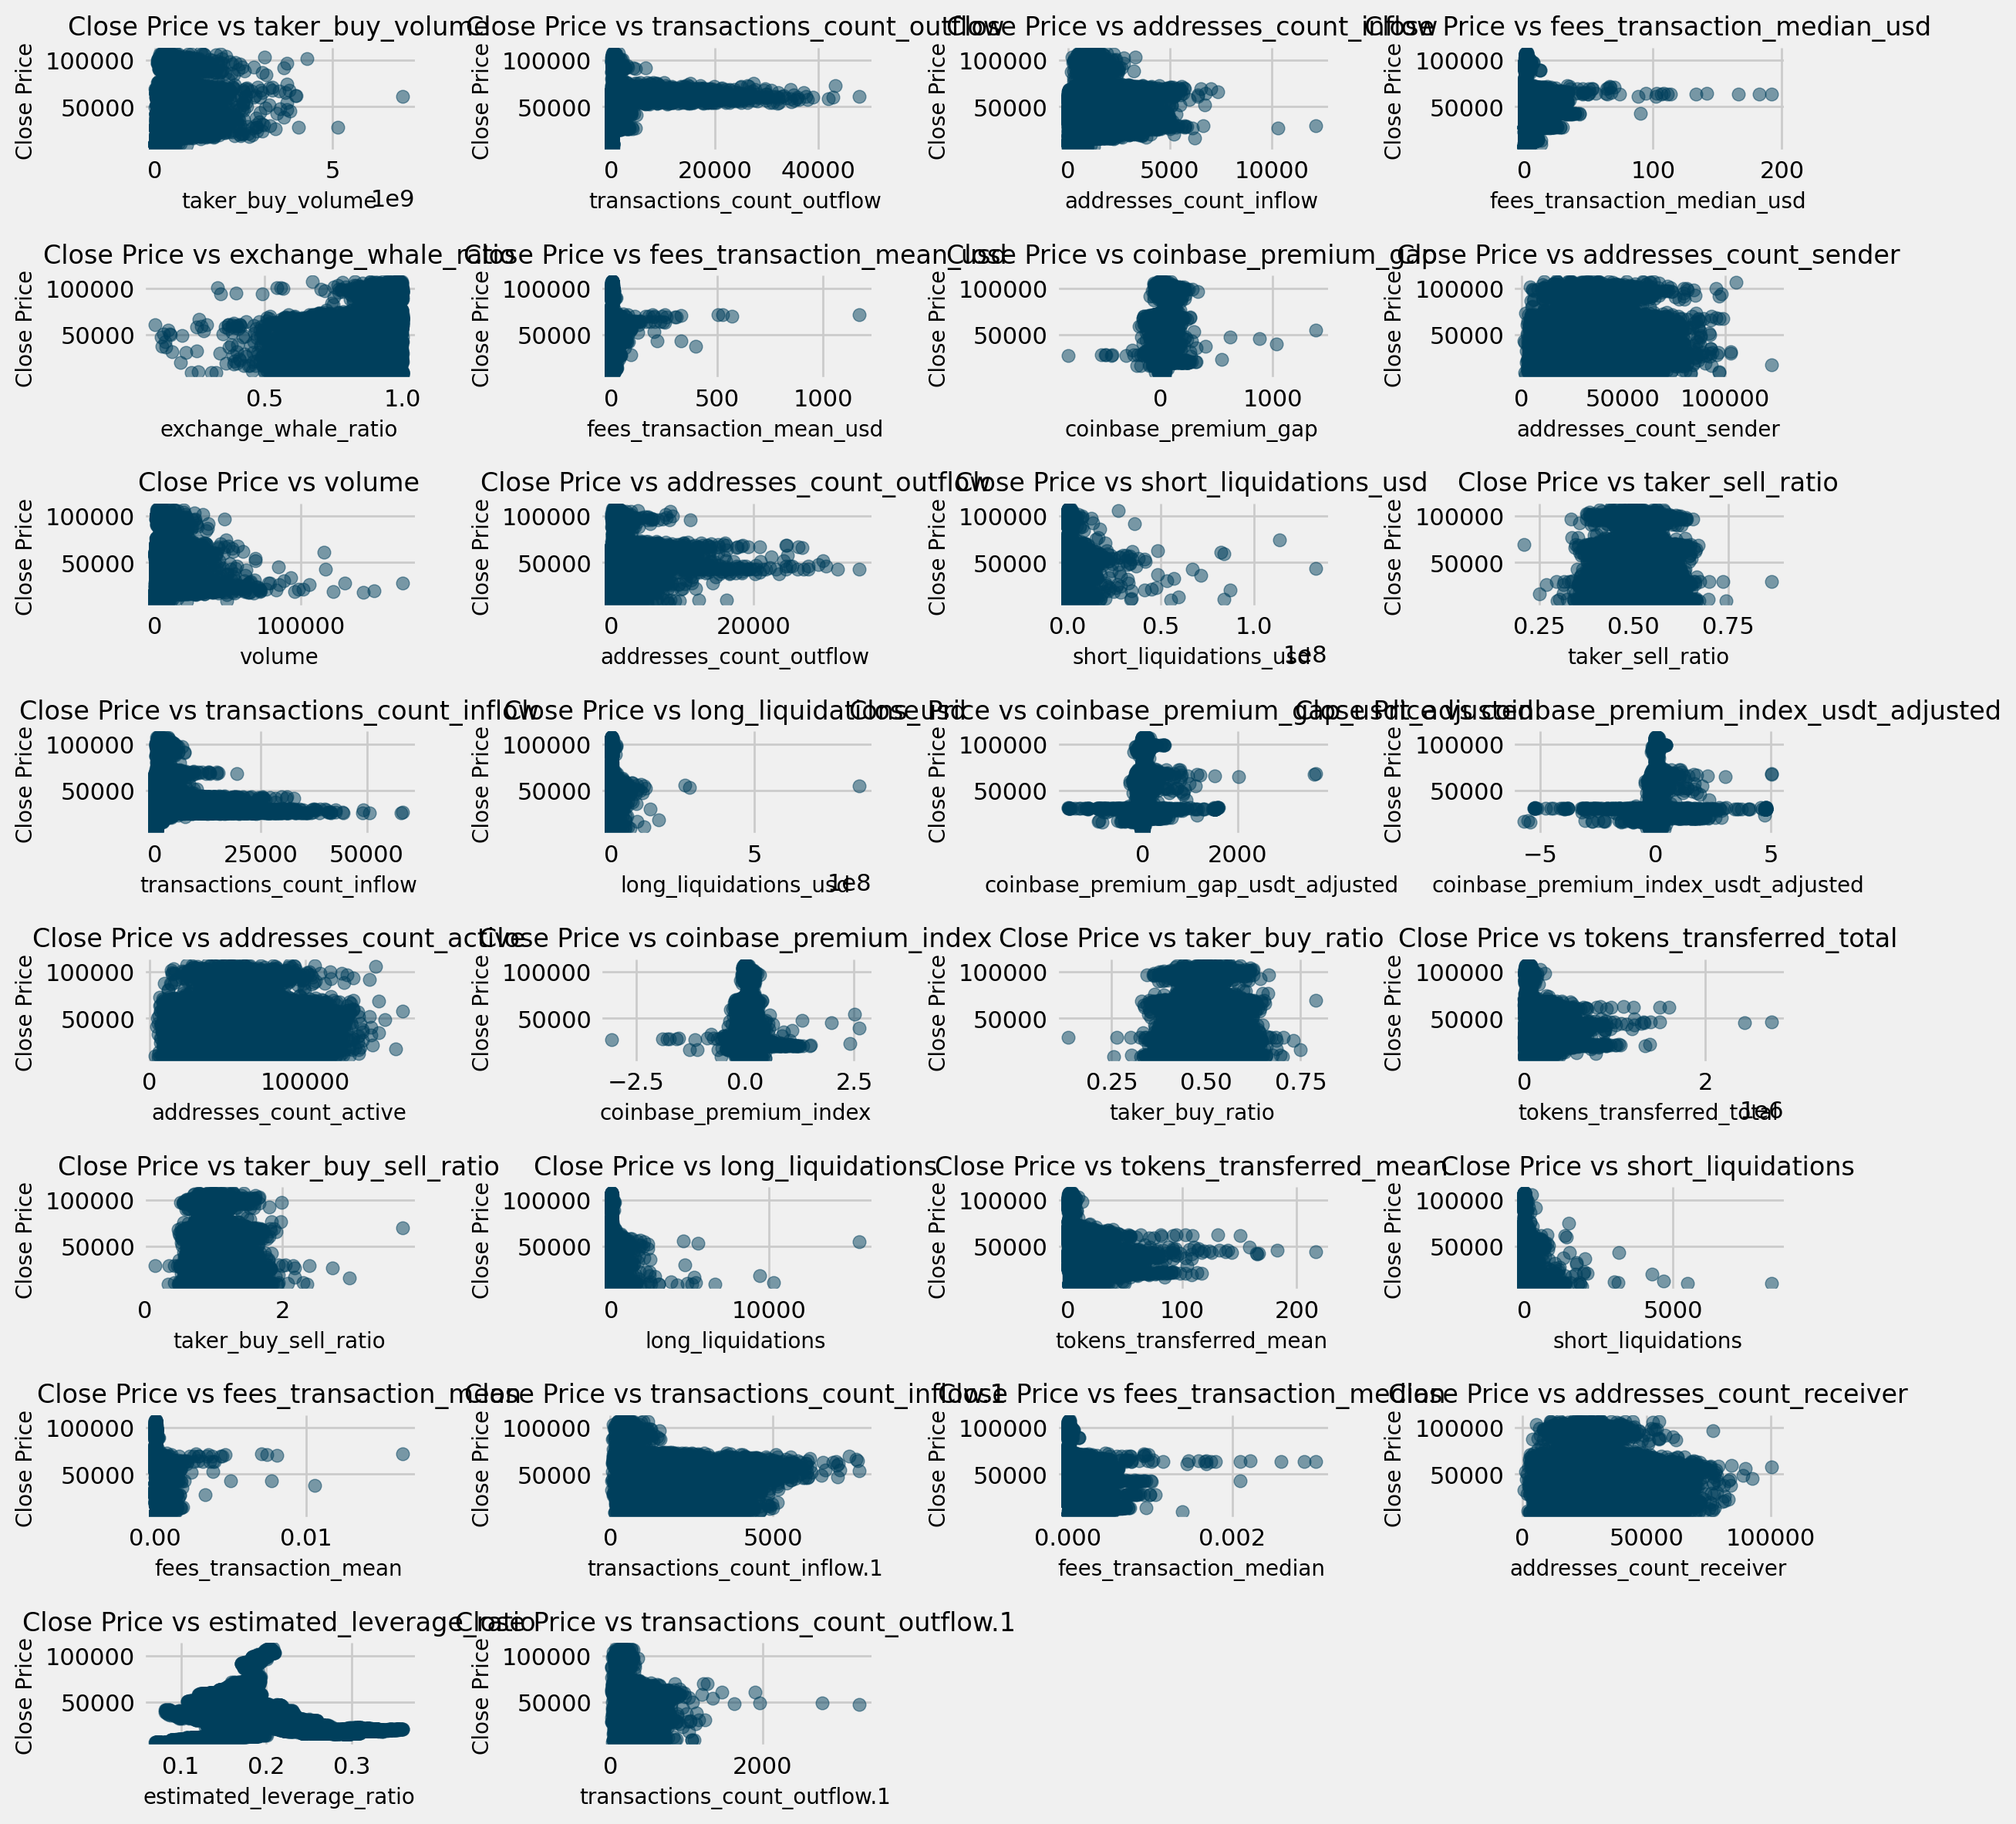

In [49]:
# Create scatter plots for these variables against close_price
plt.figure(figsize=(12, 12))

for i, var in enumerate(low_colleration, start=1):
    plt.subplot(8, 4, i)
    plt.scatter(df[var], df['close_price'], alpha=0.5)
    plt.title(f'Close Price vs {var}', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Close Price', fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

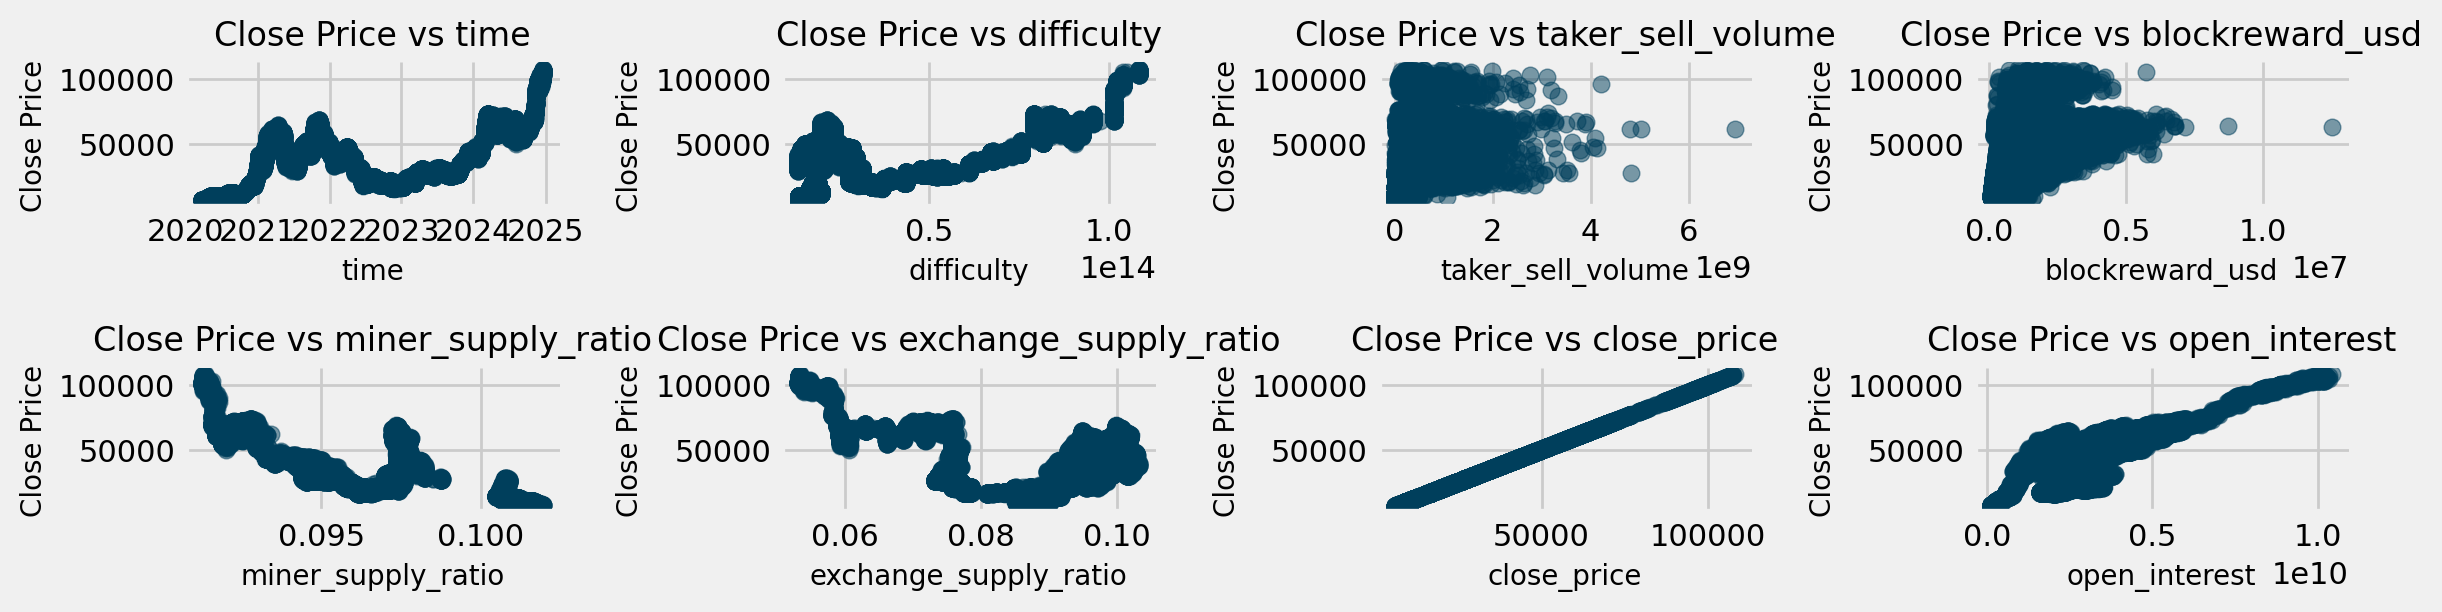

In [56]:
# Create scatter plots for these variables against close_price
plt.figure(figsize=(12, 12))

for i, var in enumerate(remaining_columns, start=1):
    plt.subplot(8, 4, i)
    plt.scatter(df[var], df['close_price'], alpha=0.5)
    plt.title(f'Close Price vs {var}', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Close Price', fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Feature Engineering

In [57]:
reduce_df = df[remaining_columns]

In [58]:
reduce_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41324 entries, 0 to 41497
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   41324 non-null  datetime64[ns]
 1   difficulty             41324 non-null  float64       
 2   taker_sell_volume      41324 non-null  float64       
 3   blockreward_usd        41324 non-null  float64       
 4   miner_supply_ratio     41324 non-null  float64       
 5   exchange_supply_ratio  41324 non-null  float64       
 6   close_price            41324 non-null  float64       
 7   open_interest          41324 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.8 MB


In [60]:
# Correlation analysis
correlation_matrix = reduce_df.corr()

price_corr = correlation_matrix['close_price'].sort_values(ascending=False)

price_corr.head(10)

close_price              1.000
open_interest            0.843
difficulty               0.640
time                     0.567
blockreward_usd          0.565
taker_sell_volume        0.301
exchange_supply_ratio   -0.337
miner_supply_ratio      -0.713
Name: close_price, dtype: float64

### Save dataframe

In [95]:
df.to_csv('cleaned_df.csv', encoding='utf-8', index=False, header=True)

In [96]:
# Load DataFrame
file = 'cleaned_df.csv'
df_file = pd.read_csv(file)

In [97]:
# Show df types
df_file.head()

time             difficulty  estimated_leverage_ratio  \
0  2020-03-25 10:00:00 16,552,923,967,337.230                     0.071   
1  2020-03-25 11:00:00 16,552,923,967,337.230                     0.072   
2  2020-03-25 12:00:00 16,552,923,967,337.230                     0.073   
3  2020-03-25 14:00:00 16,552,923,967,337.230                     0.072   
4  2020-03-25 16:00:00 16,552,923,967,337.230                     0.071   

   addresses_count_active  addresses_count_sender  addresses_count_receiver  \
0                   30656                   12888                     21617   
1                   21379                    8467                     14875   
2                   29164                   13292                     19201   
3                   25234                   10221                     18363   
4                   33872                   12897                     24823   

   exchange_whale_ratio  coinbase_premium_gap  coinbase_premium_index  \
0                 0.941                12.500                   0.189   
1                 0.886                18.640                   0.286   
2                 0.885                17.170                   0.261   
3                 0.867                14.460                   0.218   
4                 0.844                11.080                   0.166   

   coinbase_premium_gap_usdt_adjusted  coinbase_premium_index_usdt_adjusted  \
0                               1.126                                 0.017   
1                               2.369                                 0.036   
2                               7.388                                 0.112   
3                              -2.762                                -0.042   
4                              -1.695                                -0.025   

   taker_buy_volume  taker_sell_volume  taker_buy_ratio  taker_sell_ratio  \
0   122,718,808.155    157,205,129.764            0.438             0.562   
1    90,198,446.442     91,569,595.501            0.496             0.504   
2    57,963,331.726     39,976,612.040            0.592             0.408   
3    84,545,864.333     79,004,855.006            0.517             0.483   
4    58,907,506.918     48,396,834.392            0.549             0.451   

   taker_buy_sell_ratio  blockreward  blockreward_usd  fees_transaction_mean  \
0                 0.781       39.431      268,448.334                  0.000   
1                 0.985       26.232      171,000.022                  0.000   
2                 1.450       39.346      258,274.574                  0.000   
3                 1.070       39.947      264,083.365                  0.000   
4                 1.217       40.177      268,846.550                  0.000   

   fees_transaction_mean_usd  fees_transaction_median  \
0                      1.490                    0.000   
1                      1.403                    0.000   
2                      1.522                    0.000   
3                      2.156                    0.000   
4                      1.951                    0.000   

   fees_transaction_median_usd  miner_supply_ratio  addresses_count_inflow  \
0                        0.856               0.102                     160   
1                        0.784               0.102                     131   
2                        0.790               0.102                     137   
3                        1.118               0.102                      96   
4                        1.180               0.102                     109   

   addresses_count_outflow  exchange_supply_ratio  transactions_count_inflow  \
0                       96                  0.085                        118   
1                       71                  0.085                         87   
2                       81                  0.085                         97   
3                       51                  0.086                         74   
4                     

In [98]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41324 entries, 0 to 41323
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   time                                  41324 non-null  object 
 1   difficulty                            41324 non-null  float64
 2   estimated_leverage_ratio              41324 non-null  float64
 3   addresses_count_active                41324 non-null  int64  
 4   addresses_count_sender                41324 non-null  int64  
 5   addresses_count_receiver              41324 non-null  int64  
 6   exchange_whale_ratio                  41324 non-null  float64
 7   coinbase_premium_gap                  41324 non-null  float64
 8   coinbase_premium_index                41324 non-null  float64
 9   coinbase_premium_gap_usdt_adjusted    41324 non-null  float64
 10  coinbase_premium_index_usdt_adjusted  41324 non-null  float64
 11  taker_buy_volum

In [82]:
# Print summary statistics
df.describe(include='all')
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 41324  │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 8      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ difficul │  0 │    0 │ 42070000 │ 26300000 │ 13670000 │ 20610000 │ 30280000 │ 57320000 │ 10850000 │ ▇▃▂▁▂▁ │  │
│ │ ty       │    │      │   000000 │   000000 │   000000 │   000000 │   000000 │   000000 │  0000000 │        │  │
│ │ taker_se │  0 │    0 │ 26930000 │ 29690000 │  1770000 │ 95760000 │ 18410000 │ 33530000 │ 69560000 │   ▇    │  │
│ │ ll_volum │    │      │        0 │        0 │          │          │        0 │        0 │       00 │        │  │
│ │ e        │    │      │          │          │          │          │          │          │          │        │  │
│ │ blockrew │  0 │    0 │  1318000 │   849100 │    59320 │   686300 │  1135000 │  1749000 │ 12530000 │   ▇▁   │  │
│ │ ard_usd  │    │      │          │          │          │          │          │          │          │        │  │
│ │ miner_su │  0 │    0 │  0.09646 │ 0.002836 │  0.09127 │  0.09449 │  0.09712 │  0.09764 │   0.1019 │ ▃▂▃▇ ▃ │  │
│ │ pply_rat │    │      │          │          │          │          │          │          │          │        │  │
│ │ io       │    │      │          │          │          │          │          │          │          │        │  │
│ │ exchange │  0 │    0 │  0.08401 │  0.01246 │  0.05316 │  0.07536 │   0.0864 │  0.09539 │   0.1033 │ ▂▁▇▂▆▇ │  │
│ │ _supply_ │    │      │          │          │          │          │          │          │          │        │  │
│ │ ratio    │    │      │          │          │          │          │          │          │          │        │  │
│ │ close_pr │  0 │    0 │    37170 │    20110 │     5873 │    21030 │    34220 │    51510 │   108300 │  ▇▇▅▅  │  │
│ │ ice      │    │      │          │          │          │          │          │          │          │        │  │
│ │ open_int │  0 │    0 │ 27650000 │ 16990000 │ 11980000 │ 18300000 │ 26430000 │ 33920000 │ 10430000 │  ▃▇▂▁  │  │
│ │ erest    │    │      │       00 │       00 │        0 │       00 │       00 │       00 │      000 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃        ┃    ┃      ┃            ┃           ┃            ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column ┃ NA ┃ NA % ┃ shortest   ┃ longest   ┃ min        ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━

### Random Model Test

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selecting features and target for predictive modeling
# Features: Using lagged variables and additional metrics to predict future close price
df['close_price_lag1'] = df['close_price'].shift(1)
df['volume_lag1'] = df['volume'].shift(1)
features = ['close_price_lag1', 'volume_lag1']
target = 'close_price'

# Dropping rows with NaN due to lagging
model_data = df.dropna(subset=features + [target])

# Splitting the data into training and testing sets
X = model_data[features]
y = model_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(242.05969527797606, 140419.17975966682, 0.9992285981543843)

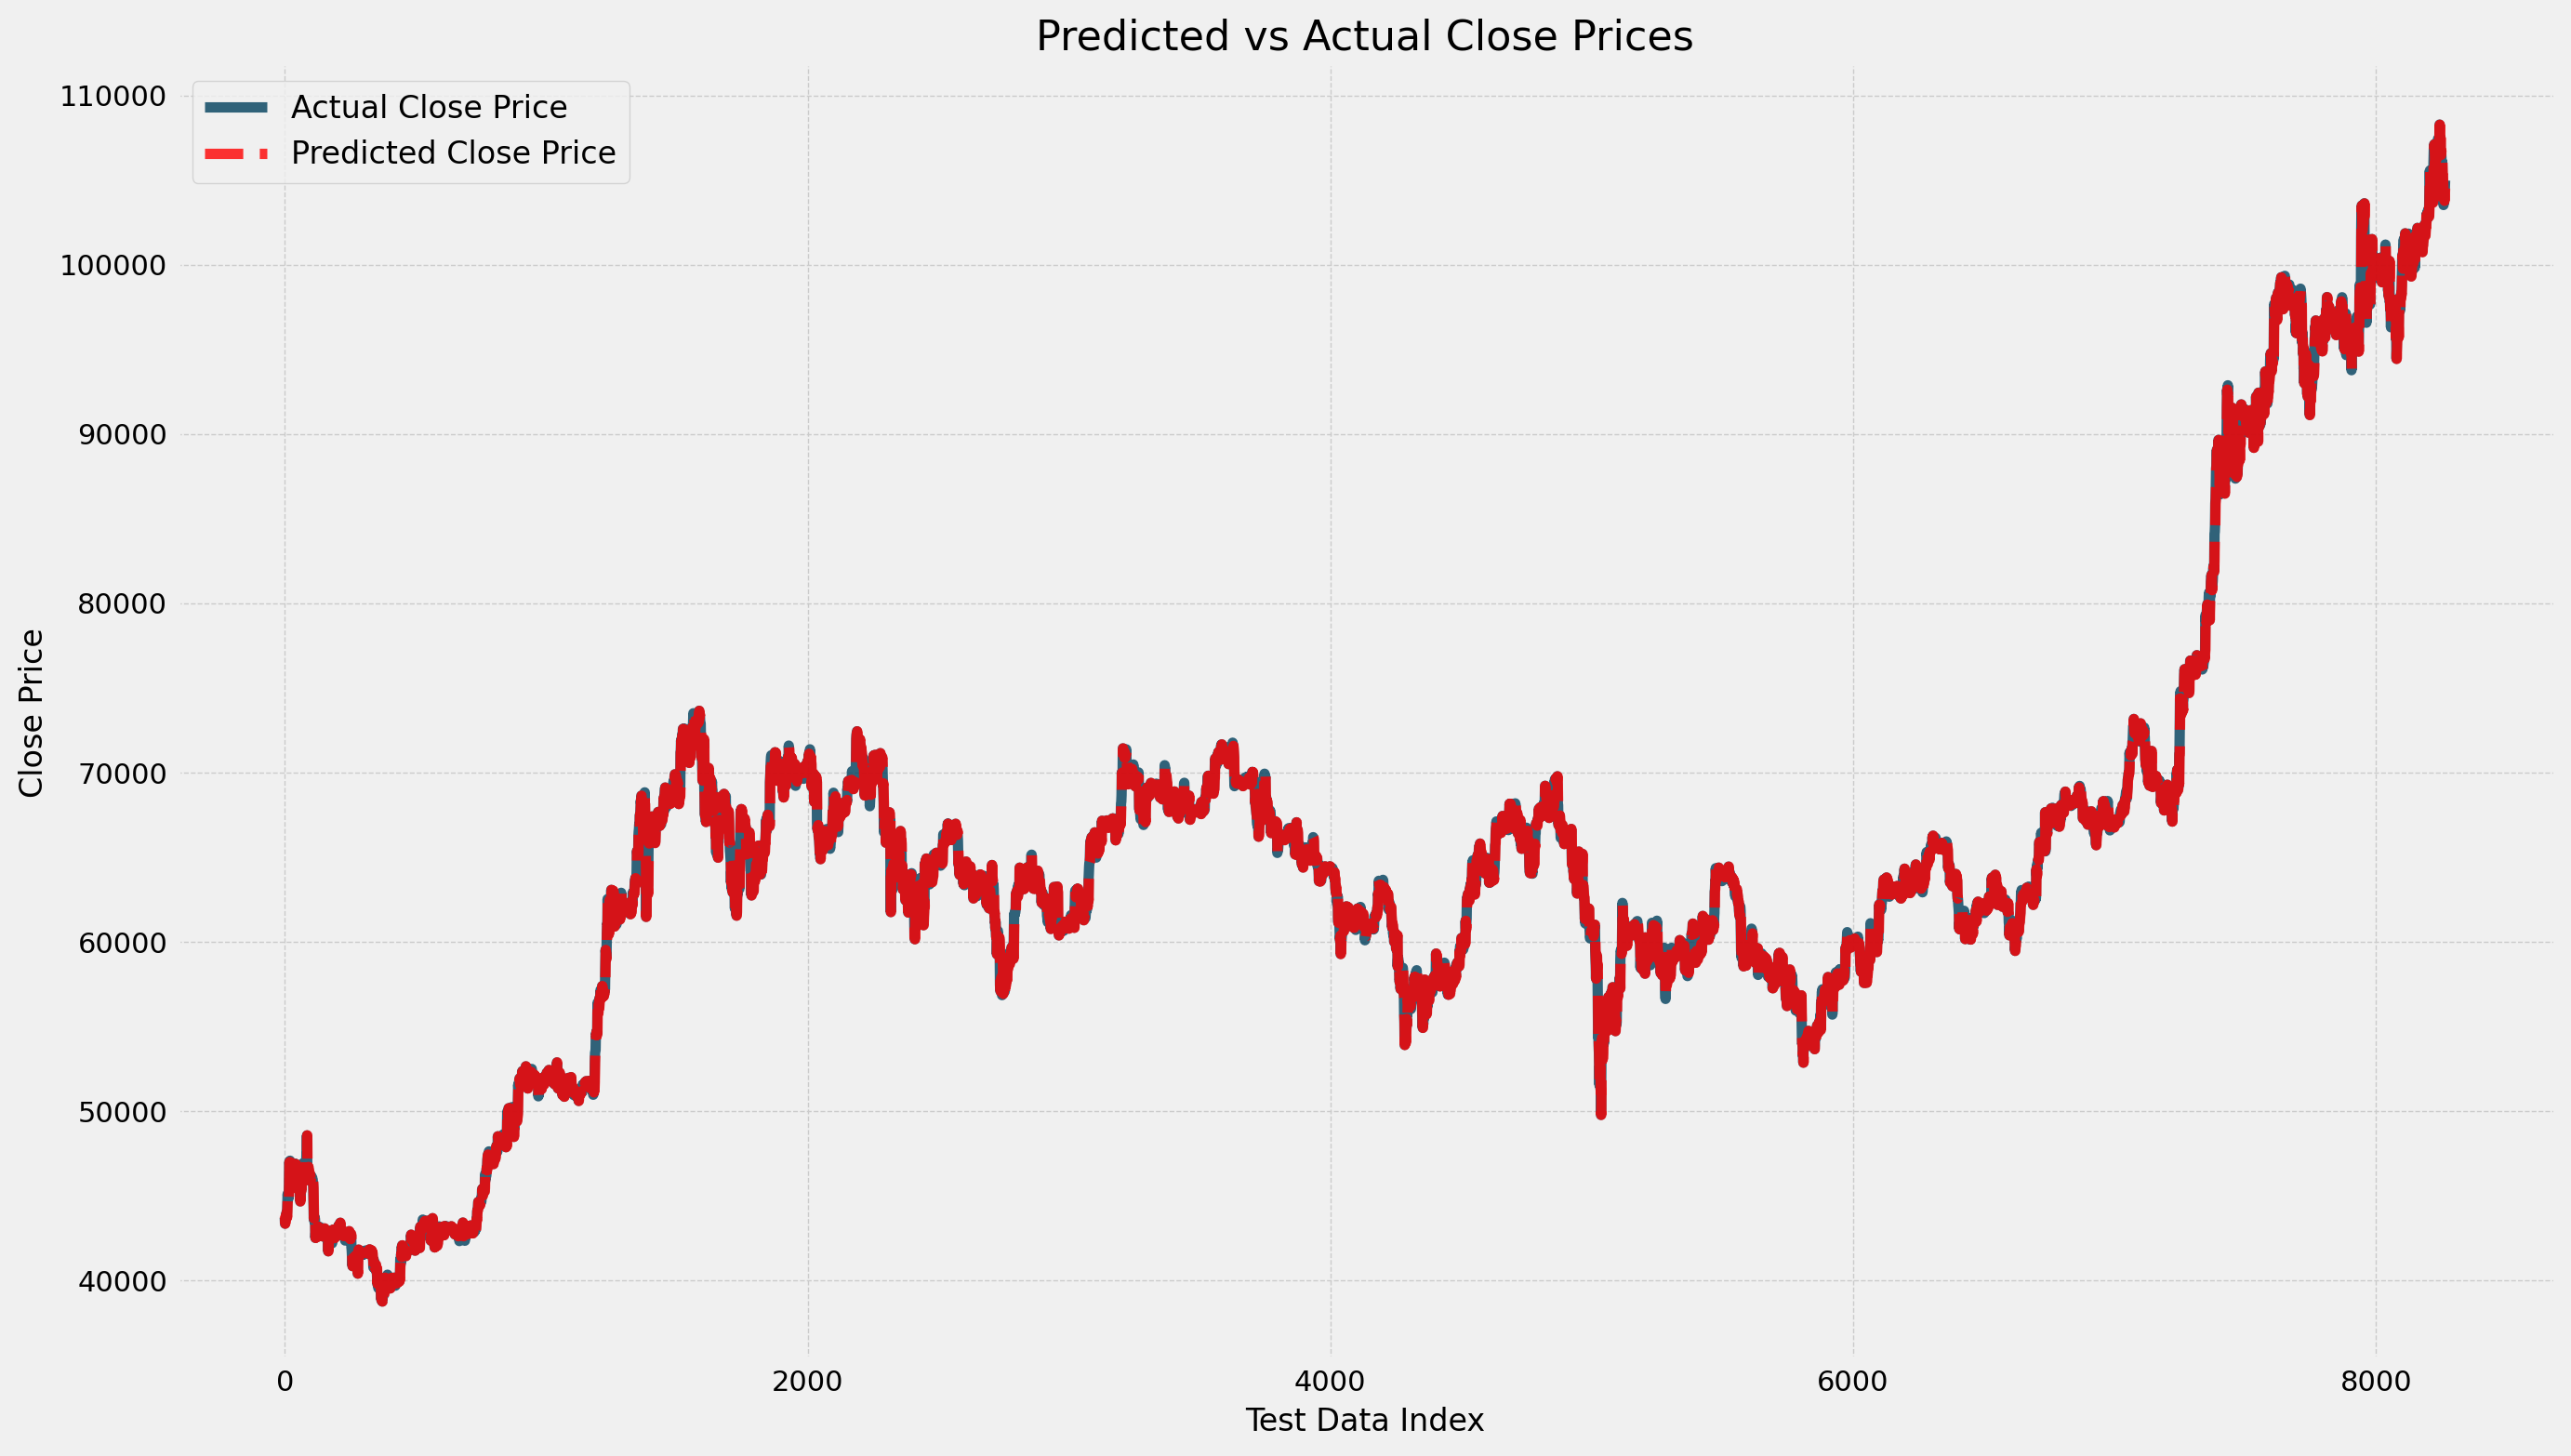

In [145]:
# Plotting predictions vs actual values

plt.figure(figsize=(14, 8))
plt.plot(y_test.values, label='Actual Close Price', alpha=0.8)
plt.plot(y_pred, label='Predicted Close Price', alpha=0.8, linestyle='--', color='red')
plt.title('Predicted vs Actual Close Prices', fontsize=16)
plt.xlabel('Test Data Index', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()